<div style="border:solid green 3px; padding: 20px">
																							
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
# импорт модуля pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option('future.no_silent_downcasting', True)

In [2]:
# чтение и запись данных в переменную 'data'
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
    data_raw = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
    data_raw = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

#### Проанализируем структуру данных

Выведем информацию о содержимом таблицы методом `.info()`

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data[data['cityCenters_nearest'].isna()==False]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.00,52.00,2018-07-19T00:00:00,2,NaN,5.00,31.00,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.00,6263.00,1.00,300.00,0.00,NaN,15.00
23691,11,9470000.00,72.90,2016-10-13T00:00:00,2,2.75,25.00,40.30,7,NaN,False,False,10.60,1.00,Санкт-Петербург,19424.00,4489.00,0.00,NaN,1.00,806.00,519.00
23693,9,4600000.00,62.40,2016-08-05T00:00:00,3,2.60,9.00,40.00,8,NaN,False,False,8.00,0.00,Петергоф,45602.00,34104.00,1.00,352.00,1.00,675.00,239.00
23694,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN


В таблице представлены данные о жилых помещениях, разбитые по следующим столбцам:

 - `'total_images'` — число фотографий квартиры в объявлении
 - `'last_price'` — цена на момент снятия с публикации
 - `'total_area'` — общая площадь квартиры в квадратных метрах (м²)
 - `'first_day_exposition'` — дата публикации
 - `'rooms'` — число комнат
 - `'ceiling_height'` — высота потолков (м)
 - `'floors_total'` — всего этажей в доме
 - `'living_area'` — жилая площадь в квадратных метрах (м²)
 - `'floor'` — этаж
 - `'is_apartment'` — апартаменты (булев тип)
 - `'studio'` — квартира-студия (булев тип)
 - `'open_plan'` — свободная планировка (булев тип)
 - `'kitchen_area'` — площадь кухни в квадратных метрах (м²)
 - `'balcony'` — число балконов
 - `'locality_name'` — название населённого пункта
 - `'airports_nearest'` — расстояние до ближайшего аэропорта в метрах (м)
 - `'cityCenters_nearest'` — расстояние до центра города (м)
 - `'parks_around3000'` — число парков в радиусе 3 км
 - `'parks_nearest'` — расстояние до ближайшего парка (м)
 - `'ponds_around3000'` — число водоёмов в радиусе 3 км
 - `'ponds_nearest'` — расстояние до ближайшего водоёма (м)
 - `'days_exposition'` — сколько дней было размещено объявление (от публикации до снятия)
 

In [5]:
# выведем первые 10 строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


В данных содержится довольно много пропусков, в том числе в категориальных переменных, например `'is_apartment'` (булев тип, но в выводе мы видим 'NaN').

В данном случае логично уточнить у поставщика данных с чем это может быть связано.

Для начала удали явные дубликаты.


In [6]:
data.drop_duplicates(ignore_index=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Явных дупликатов нет.

Выведем гистограммы, показывающие распределение данных по столбцам:

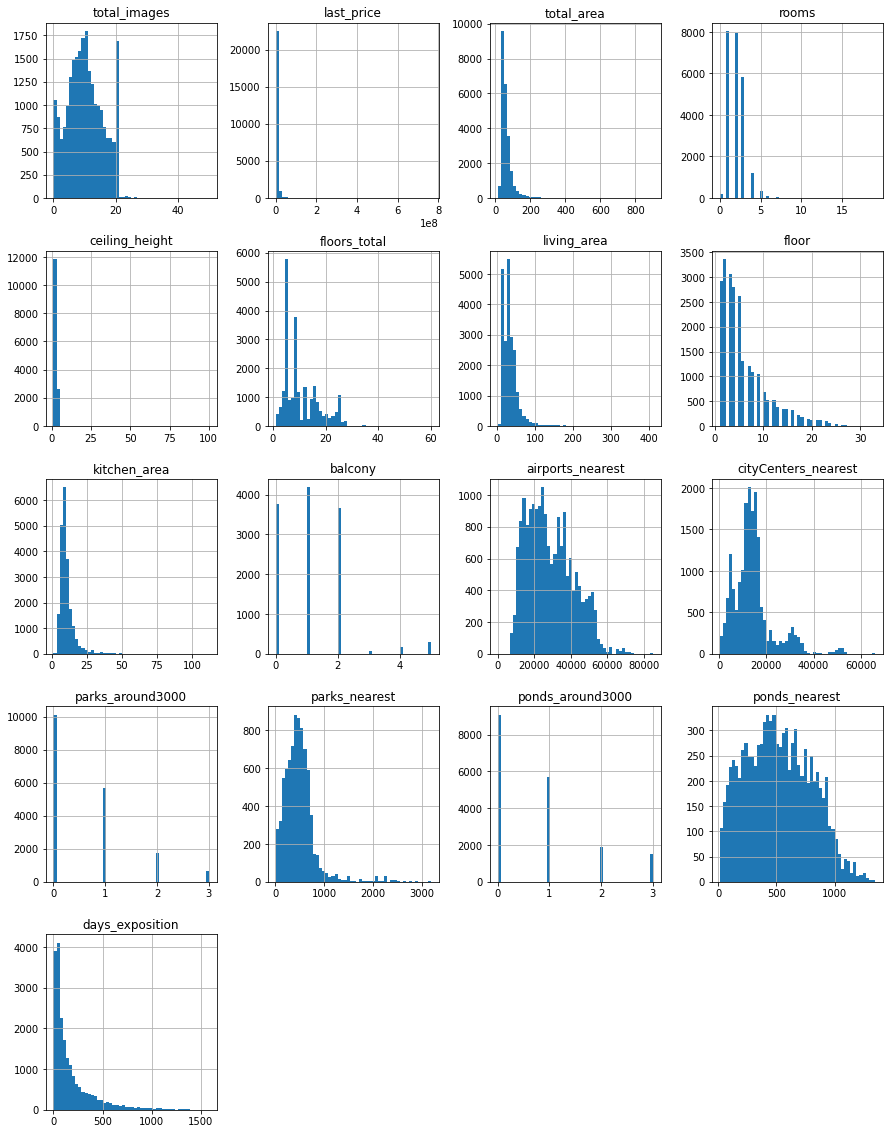

In [7]:
# диаграмма распределения данных по столбцам до предобработки
raw_hist = data.hist(figsize=(15, 20), bins=50)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

Из гистограмм видно, что данные расположены не равномерно, присутствуют выбросы и пропуски, которые необходимо устранить на этапе предобработки данных.

Выведем описательную статистику методом `.describe` для оценки столбцов столбцов содержащих количественные данные:

In [8]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Вывод подтверждает, что данные внутри столбцов неравномерны.

### Выполните предобработку данных

Выведем количество пропусков в столбцах

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Обработка пропусков: cтолбец `'is_apartment'`

В первую очередь заполним столбец с булевыми значениями `'is_apartment'` — апартаменты (булев тип)

*Т.к. у нас нет возможности уточнить причину пропусков в выборке*, предположим, что пользователь при заполнении анкеты не указывал данные в этом поле, если выставлял жилое помещение. 

Этим же предположением будем руководствоваться в дальнейшем.


In [10]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [11]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].isna().sum()

0

In [12]:
data['is_apartment'].unique()

array([ True, False])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

#### Обработка пропусков: cтолбец `'balcony'`

Заполним пропуски в столбце `'balcony'` 0, исходя из предположение, что пользователь не указывал это поле, если в его квартире нет балкона.
После этого изменим тип данных данного столбца, т.к. из метода `'.info()'` известно, что данные хранятся с типом `float64`. Преобразуем в `int64`

In [13]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [14]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')

print('Количество пропусков', data['balcony'].isna().sum(), '\nТип данных', data['balcony'].dtype)

Количество пропусков 0 
Тип данных int64


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [15]:
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

#### Обработка пропусков: cтолбец `'locality_name'`

Следующим рассмотрим столбец `data['locality_name']` на пример пропусков и рассмотрим уникальные значения и их значения:

In [16]:
print(
    'Количество пропусков: {:d} \nКоличество уникальных: {:d}'
    .format(data['locality_name'].isna().sum(),
            len(data['locality_name'].unique()))
)

Количество пропусков: 49 
Количество уникальных: 365


In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Наименования содержащие "деревня", "село", "поселок", "поселок городского типа" и тому подобные приведем к единому типу - "сельский населенный пункт" и создадим новый столбец, в котором сохраним обновленное наименование

In [18]:
data['locality_name_stat'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городского типа', 'городской', 'коттеджный'], '', regex=True)
    .replace(['поселок', 'село', 'деревня', 'сельский населенный пункт', 'имени'], '', regex=True)
    .replace(['садовое товарищество', 'садоводческое некоммерческое товарищество'], '', regex=True)
    .replace(['станция', 'платформа', 'станции', 'при железнодорожной'], '', regex=True)
    .str.strip()
)
len(data['locality_name'].unique())

365

In [19]:
pt_ceiling_height = (data
                     .groupby('locality_name_stat')['total_images'].count()
                     .sort_values(ascending=False)
                    )

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(pt_ceiling_height)

locality_name_stat
Санкт-Петербург            15721
Мурино                       590
Кудрово                      472
Шушары                       440
Всеволожск                   398
Пушкин                       369
Колпино                      338
Парголово                    327
Гатчина                      307
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 178
Новое Девяткино              144
Сертолово                    142
Ломоносов                    133
Кириши                       125
Бугры                        114
Сланцы                       112
Волхов                       111
Кингисепп                    104
Тосно                        104
Кронштадт                     96
Никольское                    94
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
Янино-1                       68
Приозерск               

Удалось преобразовать 59 элементов.
Выведем количество пропусков, если их доля не велика - удалим их:

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

In [20]:
'{:.2%}'.format(data['locality_name'].isna().sum()/data['locality_name'].count())

'0.21%'

Доля пропусков составляет всего 0,2% - данные можно удалить:

In [21]:
data.dropna(subset=['locality_name'], inplace=True)
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_stat
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Шушары
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23645,9,9700000.00,133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,True,False,False,13.83,0,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN,Санкт-Петербург
23646,14,3100000.00,59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,True,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00,Тосно
23647,18,2500000.00,56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,True,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Рождествено
23648,13,11475000.00,76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,True,False,False,23.30,2,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00,Санкт-Петербург


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Удалить пропуски в столбце locality_name - это хорошее решение. 
</div>

#### Преобразование типов: cтолбец `'first_day_exposition'`

Изменим тип данных в столбце `'first_day_exposition'` на 'datetime' для более удобного манипулирования данных

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].dtype.type

numpy.datetime64

Выведем информацию по преобразованым данным:

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [24]:
data['first_day_exposition'].describe()

/tmp/ipykernel_202/546544682.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['first_day_exposition'].describe()


count                   23650
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

#### Обработка пропусков: cтолбец `'ceiling_height'`

В столбце `'ceiling_height'` мы имеем 9195 пропусков что составит 38.8% от общей выборки.

In [25]:
'{:.2%}'.format(data['ceiling_height'].isna().sum()/len(data))

'38.73%'

Соответственно, этими данными мы не можем пренебречь.

Рассмотрим распределение данных внутри этого столбца:

<AxesSubplot:>

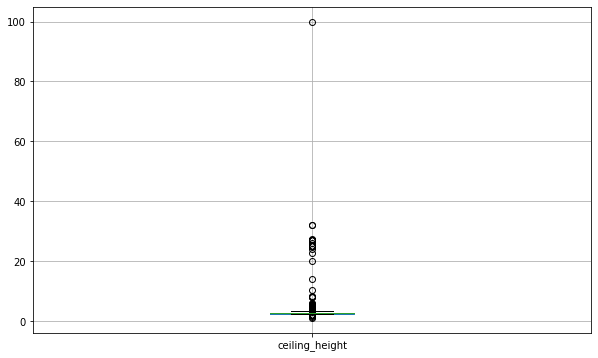

In [26]:
(data['ceiling_height']
 .plot(
     kind='box', 
     grid=True,
     figsize=(10, 6)
 )
)

Диаграмма размаха по умолчанию использует диапазон значений от 1 до 100, на что указывает ранее вызванный метод `.describe()`, при этом значения Q3 не превышают значения 2.8, то есть в диапазоне от 2.8 до 100 находится 25% данных указанных в столбце, что скорее всего являются выбросами или аномалиями.

Для этих данных необходимо провести дополнительный анализ, т.к. значения могут иметь неверный формат записи или пропуски.

Предположим, что пропуски можно заполнить медианой внутри группы по `'floors_total'` (количеству этажей в здании), если значений в группе нет, заполним их медианой по всем значениям. 
Существует ли связь между этажностью и высотой потолков в квартирах здания:

In [27]:
'{:.2%}'.format(data['floors_total'].corr(data['ceiling_height']))

'-2.86%'

И существует ли связь между занимаемым этажем и высотой потолков в квартирах здания:

In [28]:
'{:.2%}'.format(data['floor'].corr(data['ceiling_height']))

'-1.17%'

Связь между этажностью и высотой потолков в квартирах здания слабая, на уровне 3%, что не подтверждает ранее выдвинутой гипотезы, однако, для начала исправим выбросы.

Рассмотрим уникальные значения столбца и их распределение:

In [29]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [30]:
data['ceiling_height'].count()

14490

В данных встречаются выбросы, такие как `'32'`, `'27'`, `'14'` или `'100'`.
Если значения `'32'` и `'27'` могут быть ошибкой при записи данных ( `'32'` = `'3.2'`, `'27'` = `'2.7'`, по условию задачи), т.е. выбросами, значения `'14'` или `'100'` могут быть программными аномалиями, о существовании которых стоит уточнить.

Напишем функцию, которая преобразует значения в единный вид:

In [31]:
def convert_to_decimal(val):
    if 20 <= val:
        return val/10
    else:
        return val
        
    
data['ceiling_height'] = data['ceiling_height'].apply(convert_to_decimal) 

Выведем уникальные значения столбца `'ceiling_height'` и сверим количество данных для проверки:

In [32]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [33]:
data['ceiling_height'].count()

14490

Рассмотрим диаграммы размаха и распределения по обновленным данным, а также построим матрицу корреляции по ранее расмотренным признакам:

<AxesSubplot:>

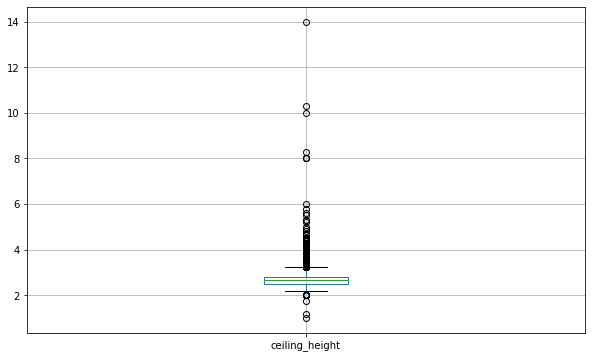

In [34]:
(data['ceiling_height']
 .plot(
     kind='box',
     grid=True,
#     ylim=(2, 3.5)
     figsize=(10, 6)
      )
)

В качестве параметра `bins` будем использовать максимальное количество этажей в выборке:

<AxesSubplot:ylabel='Frequency'>

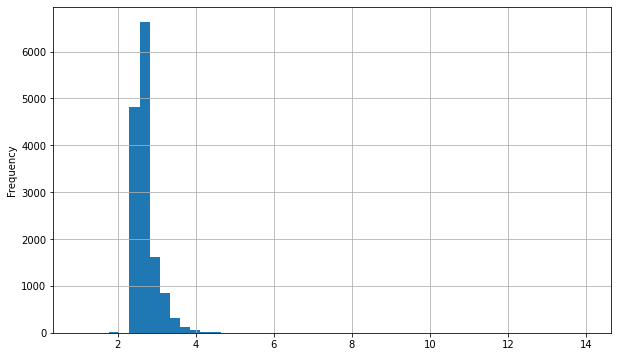

In [35]:
(data['ceiling_height'].plot(
     kind='hist',
     bins= 50,
     grid=True,
     figsize=(10, 6)
      )
)

Максимальное значение в выборке это 14 метров, а из диаграммы распределения мы видим, что присутствуют значени от 10 и более метров, что по-прежнему вызывает сомнения, но пока опустим это. 

In [36]:
data['ceiling_height'].describe()

count   14490.00
mean        2.73
std         0.32
min         1.00
25%         2.51
50%         2.65
75%         2.80
max        14.00
Name: ceiling_height, dtype: float64

In [37]:
data[['ceiling_height', 'floors_total', 'floor']].corr()

,ceiling_height,floors_total,floor
ceiling_height,1.00,-0.08,-0.04
floors_total,-0.08,1.00,0.68
floor,-0.04,0.68,1.00


Видим усиление линейной связи между атрибутами `data['ceiling_height']` и `data['floors_total']`, однако этого не достаточно, для использования в качестве признака для обработки пропусков.

Для обработки пропусков будем использовать нормативную документацию: [СНиП 31-01-2003 Здания жилые многоквартирные](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=%D0%BF%D0%BE%20%D0%BF%D0%BE%D0%B6%D0%B0%D1%80%D0%BD%D0%BE%D0%B9%20%D0%B1%D0%B5%D0%B7%D0%BE%D0%BF%D0%B0%D1%81%D0%BD%D0%BE%D1%81%D1%82%D0%B8-,%D0%A1%D0%9D%D0%B8%D0%9F%2031%2D01%2D2003%20%D0%97%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%B6%D0%B8%D0%BB%D1%8B%D0%B5%20%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%BD%D1%8B%D0%B5,-%D0%A1%D0%9D%D0%B8%D0%9F%2031%2D01)


Так например:

[5.8 Высота (от пола до потолка) жилых помещений и кухни (кухни-столовой) в климатических районах IА, IБ, IГ, IД и IVA должна быть не менее 2,7 м, а в других климатических районах - не менее 2,5 м.](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=5.8%C2%A0%D0%92%D1%8B%D1%81%D0%BE%D1%82%D0%B0%20(%D0%BE%D1%82%20%D0%BF%D0%BE%D0%BB%D0%B0%20%D0%B4%D0%BE%20%D0%BF%D0%BE%D1%82%D0%BE%D0%BB%D0%BA%D0%B0)%20%D0%B6%D0%B8%D0%BB%D1%8B%D1%85%20%D0%BF%D0%BE%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%B8%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8%20(%D0%BA%D1%83%D1%85%D0%BD%D0%B8%2D%D1%81%D1%82%D0%BE%D0%BB%D0%BE%D0%B2%D0%BE%D0%B9)%20%D0%B2%20%D0%BA%D0%BB%D0%B8%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85%20%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%B0%D1%85%20I%D0%90%2C%20I%D0%91%2C%20I%D0%93%2C%20I%D0%94%20%D0%B8%20IVA%20%D0%B4%D0%BE%D0%BB%D0%B6%D0%BD%D0%B0%20%D0%B1%D1%8B%D1%82%D1%8C%20%D0%BD%D0%B5%20%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%202%2C7%20%D0%BC%2C%20%D0%B0%20%D0%B2%20%D0%B4%D1%80%D1%83%D0%B3%D0%B8%D1%85%20%D0%BA%D0%BB%D0%B8%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85%20%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%B0%D1%85%20%2D%20%D0%BD%D0%B5%20%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%202%2C5%20%D0%BC.)

Отсюда мы можем сделать вывод, что для формирования какого-то среднего значения для заполнения пропусков можно использовать поле `'locality_name'`. Создадим сводную таблицу в которой выведем медианное значение высоты потолка, сгруппированные по городу пустые значения заполним медианной по всему столбцу:

In [38]:
pt_ceiling_height = (
    data
    .groupby('locality_name_stat')['ceiling_height']
    .agg([
        'median',
        'count'
    ])
    .fillna(data['ceiling_height'].median())
    .sort_values(by='median', ascending=False)
    .reset_index()
)

In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(pt_ceiling_height)

          locality_name_stat  median  count
0               Бокситогорск    3.90      2
1                      Ропша    3.20      1
2                   Ваганово    3.15      2
3                     Глинка    3.10      2
4                    Счастье    3.00      1
5                   Каськово    3.00      1
6                        Бор    2.95      1
7                  Лисий Нос    2.85      2
8                  Новоселье    2.80     12
9                     Репино    2.77      4
10           Александровская    2.77      1
11                   Кудрово    2.75    195
12                   Куттузи    2.75      3
13                   Заневка    2.75      4
14                  Синявино    2.75     12
15                 Мистолово    2.75      3
16               Новая Ропша    2.75      1
17                  Кальтино    2.75      2
18                      Юкки    2.73      4
19                Сестрорецк    2.70    129
20                  Кикерино    2.70      4
21                    Мурино    

In [40]:
data['ceiling_height'] = (
    data['ceiling_height']
    .fillna(
        data.groupby('locality_name_stat')['ceiling_height'].transform('median')
    )
)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Хороший способ)
</div>

Проверим измененые данные и оставшиеся пропуски если они есть:

In [41]:
data['ceiling_height'].describe()

count   23555.00
mean        2.71
std         0.26
min         1.00
25%         2.55
50%         2.70
75%         2.70
max        14.00
Name: ceiling_height, dtype: float64

In [42]:
data['ceiling_height'].isna().sum()

95

Проверим долю пропусков и, если их доля не велика, удалим их

In [43]:
'Доля пропусков: {:.2%}'.format(len(data[data['ceiling_height'].isna()])/len(data))

'Доля пропусков: 0.40%'

In [44]:
data.dropna(subset=['ceiling_height'], inplace=True)
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_stat
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург
1,7,3350000.00,40.40,2018-12-04,1,2.63,11.00,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Шушары
2,10,5196000.00,56.00,2015-08-20,2,2.70,5.00,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург
3,0,64900000.00,159.00,2015-07-24,3,2.70,14.00,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23550,9,4600000.00,62.40,2016-08-05,3,2.60,9.00,40.00,8,True,False,False,8.00,0,Петергоф,45602.00,34104.00,1.00,352.00,1.00,675.00,239.00,Петергоф
23551,9,9700000.00,133.81,2017-03-21,3,3.70,5.00,73.30,3,True,False,False,13.83,0,Санкт-Петербург,24665.00,4232.00,1.00,796.00,3.00,381.00,NaN,Санкт-Петербург
23552,14,3100000.00,59.00,2018-01-15,3,2.50,5.00,38.00,4,True,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00,Тосно
23553,13,11475000.00,76.75,2017-03-28,2,3.00,17.00,NaN,12,True,False,False,23.30,2,Санкт-Петербург,39140.00,10364.00,2.00,173.00,3.00,196.00,602.00,Санкт-Петербург


In [45]:
data['ceiling_height'].isna().sum()

0

Пропусков не осталось, можем переходить к следующему столбцу.

#### Обработка пропусков: cтолбец `'living_area'`

При рассмотрени столбца `'living_area'` так же можно увидеть следующее:

In [46]:
print(
    'Количество пропусков: {:d} \nДоля пропусков: {:.2%}'
    .format(data['living_area'].isna().sum(),
            data['living_area'].isna().sum()/len(data))
)

Количество пропусков: 1876 
Доля пропусков: 7.96%


Логичным предположением является, что жилая площадь квартиры будет зависеть от количества комнат в квартире, что подтверджает вывод метода `.corr()` выше.

Поэтому можно использовать сгруппированные по количеству комнат медианные значения `data['living_area']`

In [47]:
'Корреляция {:.2%}'.format(data['living_area'].corr(data['rooms']))

'Корреляция 84.61%'

In [48]:
pt_living_area = data.groupby('rooms')['living_area'].agg(['median', 'mean', 'count'])
pt_living_area

,median,mean,count
rooms,,,
0,18.00,18.91,182
1,17.60,17.89,7358
2,30.50,31.74,7244
3,45.00,47.38,5337
4,63.80,67.04,1084
5,91.78,100.01,292
6,123.90,130.98,99
7,145.00,163.56,53
8,161.00,168.68,12


Из таблицы выше можно увидеть, что в поле `'rooms'` имеются нули, при этом при вызове метода `.info()` пропусков не было, но это не логично, такую информацию стоит уточнить, т.к. причиной может быть как ошибка записи, так и аномальное значение запраграммированое в БД.


Также можно увидеть несколько выбросов в строках с индексами `12` и `15`

Для начала рассмотрим значения по условию `'rooms' == 0`:

In [49]:
fltr = (data['rooms'] == 0)
data[fltr]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_stat
144,1,2450000.00,27.00,2017-03-30,0,2.70,24.00,15.50,2,True,True,False,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00,Мурино
349,4,2320000.00,25.00,2017-09-27,0,2.75,14.00,17.00,1,True,False,True,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00,Кудрово
440,8,2480000.00,27.11,2018-03-12,0,2.70,17.00,24.75,4,True,True,False,NaN,2,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64.00,Санкт-Петербург
508,0,3375000.00,34.40,2017-03-28,0,2.64,26.00,24.30,19,True,False,True,NaN,1,посёлок Парголово,53115.00,19292.00,0.00,NaN,1.00,593.00,430.00,Парголово
608,2,1850000.00,25.00,2019-02-20,0,2.63,10.00,NaN,7,True,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00,Шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.00,26.00,2017-09-01,0,2.70,25.00,18.00,16,True,True,False,NaN,0,Санкт-Петербург,11405.00,13222.00,0.00,NaN,1.00,623.00,14.00,Санкт-Петербург
23442,0,2500000.00,27.70,2017-09-28,0,2.70,24.00,18.00,4,True,False,True,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Мурино
23554,15,3350000.00,26.00,2018-09-07,0,2.70,19.00,NaN,8,True,True,False,NaN,0,Санкт-Петербург,18090.00,17092.00,0.00,NaN,2.00,112.00,31.00,Санкт-Петербург
23592,10,1450000.00,29.00,2017-11-11,0,2.56,9.00,18.00,8,True,False,True,NaN,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.00,Никольское


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Немного изменю алгоритм: для того, что явно отлавливать студии:
</div>

Заполним пропуски исходя из значения в столбце `'studio'`:
 - если значение True, то изменим `'rooms'` на `1`, иначе оставим без изменений: 

In [50]:
data['rooms'] = data.apply(lambda x: 1 if x['studio'] else x['rooms'], axis=1)

выведем сохраненный ранее срез, чтобы убедиться в результате:

In [51]:
data[fltr]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_stat
144,1,2450000.00,27.00,2017-03-30,1,2.70,24.00,15.50,2,True,True,False,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00,Мурино
349,4,2320000.00,25.00,2017-09-27,0,2.75,14.00,17.00,1,True,False,True,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00,Кудрово
440,8,2480000.00,27.11,2018-03-12,1,2.70,17.00,24.75,4,True,True,False,NaN,2,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64.00,Санкт-Петербург
508,0,3375000.00,34.40,2017-03-28,0,2.64,26.00,24.30,19,True,False,True,NaN,1,посёлок Парголово,53115.00,19292.00,0.00,NaN,1.00,593.00,430.00,Парголово
608,2,1850000.00,25.00,2019-02-20,1,2.63,10.00,NaN,7,True,True,False,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.00,Шушары
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.00,26.00,2017-09-01,1,2.70,25.00,18.00,16,True,True,False,NaN,0,Санкт-Петербург,11405.00,13222.00,0.00,NaN,1.00,623.00,14.00,Санкт-Петербург
23442,0,2500000.00,27.70,2017-09-28,0,2.70,24.00,18.00,4,True,False,True,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.00,Мурино
23554,15,3350000.00,26.00,2018-09-07,1,2.70,19.00,NaN,8,True,True,False,NaN,0,Санкт-Петербург,18090.00,17092.00,0.00,NaN,2.00,112.00,31.00,Санкт-Петербург
23592,10,1450000.00,29.00,2017-11-11,0,2.56,9.00,18.00,8,True,False,True,NaN,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.00,Никольское


и посчитаем обновленные кол-во строк с пропусками и их долю от общего массива данных

In [52]:
print(
    'Количество пропусков: {:d} \nДоля пропусков: {:.2%}'
    .format(len(data[data['rooms']==0]),
            len(data[data['rooms']==0])/len(data))
)

Количество пропусков: 58 
Доля пропусков: 0.25%


Доля менее 1%, поэтому можем удалить эти строки и убедимся в этом:

In [53]:
data = data[data['rooms']!=0]

In [54]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Для того, чтобы явно отслеживать студии вернем в поле `'rooms'` значение `0`, если поле `'studio' == True`

In [55]:
data['rooms'] = data.apply(lambda x: 0 if x['studio'] else x['rooms'], axis=1)
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Заполним пропуски в столбце `'living_area'` медианным значениями, сгруппироваными по полю `'rooms'`

In [56]:
data['living_area'] = (
    data['living_area']
    .fillna(
        data.groupby('rooms')['living_area'].transform('median')
    )
)

Проверим не осталось ли пропусков и рассмотрим статистику по полю `data['living_area']`:

In [57]:
data['living_area'].isna().sum()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

#### Обработка пропусков: cтолбец `'kitchen_area'`

In [58]:
print(
    'Количество пропусков: {:d} \nДоля пропусков: {:.2%}'
    .format(data['kitchen_area'].isna().sum(),
            data['kitchen_area'].isna().sum()/len(data))
)

Количество пропусков: 2185 
Доля пропусков: 9.30%


Логично предположить, что площадь жилой площади находится в прямой зависимости от площади кухни или от количества комнат в квартире. 

Проверим это:

In [59]:
data[['living_area', 'kitchen_area', 'rooms']].corr()

,living_area,kitchen_area,rooms
living_area,1.00,0.42,0.85
kitchen_area,0.42,1.00,0.27
rooms,0.85,0.27,1.00


In [60]:
'Корреляция {:.2%}'.format(data['kitchen_area'].corr(data['living_area']))

'Корреляция 42.42%'

In [61]:
data.groupby('living_area')['kitchen_area'].agg(['median', 'count'])

,median,count
living_area,,
2.00,9.00,1
3.00,13.50,2
5.00,NaN,0
5.40,9.80,1
6.00,17.00,1
...,...,...
322.30,19.50,1
332.00,22.00,1
347.50,25.00,1


Как и в пердыдущих случаях используем медианное значение `data['living_area']` сгруппированное по количеству комнат в квартире:

In [62]:
data['kitchen_area'] = (
    data['kitchen_area']
    .fillna(
        data.groupby('living_area')['kitchen_area'].transform('median')
    ).fillna(data['kitchen_area'].median())
)

Проверим на наличие пропусков и рассмотрим описание поля:

In [63]:
data['kitchen_area'].isna().sum()

0

In [64]:
data['kitchen_area'].describe()

count   23497.00
mean       10.53
std         5.67
min         1.30
25%         7.30
50%         9.50
75%        11.70
max       112.00
Name: kitchen_area, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

### Добавьте в таблицу новые столбцы

Для детального анализа нам необходимо добавить несколько новых столбцов

#### Цена 1 кв. метра

Выведем новый столбец, в котором будет указана цена за 1 кв.м. по каждому полю. Значение округлим до 2-х знаков:

In [65]:
data['price_for_square_meter'] = round((data['last_price'] / data['total_area']), 2)
data['price_for_square_meter'].describe()

count     23497.00
mean      99680.00
std       50301.59
min         111.83
25%       76923.08
50%       95070.42
75%      114285.71
max     1907500.00
Name: price_for_square_meter, dtype: float64

#### Срезы по дате

**День недели**

In [66]:
data['week_day'] = data['first_day_exposition'].dt.weekday
sorted(data['week_day'].unique())

[0, 1, 2, 3, 4, 5, 6]

**Месяц публикации**

Для читаемости можно сделать 2 новых столбца:
 - один, содержит номер месяца от 1 до 12;
 - второй, название месяца.

Для второго варианта создадим словарь содержащий пары: индекс месяца - имя месяца

In [67]:
month_dict = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

Создадим столбец `'month'`, содержащий номера месяца из столбца `data['first_day_exposition']`

In [68]:
data['month'] = data['first_day_exposition'].dt.month
sorted(data['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Теперь используя данные столбца `data['month']` в качестве ключа к словарю `month_dict` создадим столбец с названием месяца

In [69]:
data['month_name'] = data['month'].apply(lambda x: month_dict.get(x))
data['month_name'].unique()

array(['Март', 'Декабрь', 'Август', 'Июль', 'Июнь', 'Сентябрь', 'Ноябрь',
       'Апрель', 'Май', 'Февраль', 'Январь', 'Октябрь'], dtype=object)

**Создадим столбец `Year`**

In [70]:
data['year'] = data['first_day_exposition'].dt.year
data['year'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

#### Группировка по этажу

Введем новы признак - тип этажа квартиры (значения — «‎первый», «последний», «другой»), для этого напишем функцию: 

In [71]:
def floor_type(floor, floors_total):
    if ((floor == floors_total) and floors_total!=1):
        return 'последний'
    if (floor == 1):
        return 'первый'
    else:
        return 'другой'

In [72]:
data['floor_type'] = data.apply(lambda x: floor_type(x['floor'], x['floors_total']), axis=1)

Проверим значения в новом столбце:

In [73]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Выедем распределение признака на примере значений `'floors_total'` от 1 до 4.
Для иной выборки нам потребуется применить:

 $ \sum\limits_1^i$, где i - необходимое количество этажей в доме (значение `data['floors_total']`)
 - в коде `sum(range(i+1))`, где i - необходимое количество этажей в доме (значение `data['floors_total']`)


In [74]:
data.groupby(['floors_total', 'floor'])['floor_type'].last().head(sum(range(6)))

floors_total  floor
1.00          1           первый
2.00          1           первый
              2        последний
3.00          1           первый
              2           другой
              3        последний
4.00          1           первый
              2           другой
              3           другой
              4        последний
5.00          1           первый
              2           другой
              3           другой
              4           другой
              5        последний
Name: floor_type, dtype: object

#### Расстояние до центра города: перевод в километры

In [75]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_stat,price_for_square_meter,week_day,month,month_name,year,floor_type
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,Санкт-Петербург,120370.37,3,3,Март,2019,другой
1,7,3350000.00,40.40,2018-12-04,1,2.63,11.00,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,Шушары,82920.79,1,12,Декабрь,2018,первый
2,10,5196000.00,56.00,2015-08-20,2,2.70,5.00,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,Санкт-Петербург,92785.71,3,8,Август,2015,другой
3,0,64900000.00,159.00,2015-07-24,3,2.70,14.00,45.00,9,True,False,False,10.00,0,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,Санкт-Петербург,408176.10,4,7,Июль,2015,другой
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,Санкт-Петербург,100000.00,1,6,Июнь,2018,другой


Для перевода расстояния, указанного в столбце `data['cityCenters_nearest']` из метров в километры используем раннеенаписанную функцияю `convert_to_decimal` и слегка преобразуем ее:

In [76]:
def convert_to_km(val):
    if val:
        return round((val/1000), 2)    

In [77]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'].apply(convert_to_km)

Проверим преобразованные данные:

In [78]:
data[['cityCenters_nearest', 'cityCenters_nearest_km']].head(10)

,cityCenters_nearest,cityCenters_nearest_km
0,16028.00,16.03
1,18603.00,18.60
2,13933.00,13.93
3,6800.00,6.80
4,8098.00,8.10
5,NaN,NaN
6,19143.00,19.14
7,11634.00,11.63
8,NaN,NaN
9,15008.00,15.01


Оценим количество пропусков:

In [79]:
data['cityCenters_nearest'].isna().sum()

5394

Исходя из того, что геоданные выставляются автоматически, логично задать вопрос поставщику данных о причинах, однако не имея такой возможности удалим их.

In [80]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(data[data['cityCenters_nearest'].isna()].groupby('locality_name_stat')['locality_name'].count().sort_values(ascending=False))

locality_name_stat
Мурино                     581
Кудрово                    460
Всеволожск                 398
Гатчина                    307
Выборг                     237
Новое Девяткино            144
Сертолово                  141
Кириши                     125
Бугры                      114
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  90
Коммунар                    89
Сосновый Бор                87
Кировск                     84
Отрадное                    80
Янино-1                     67
Приозерск                   66
Старая                      64
Санкт-Петербург             61
Шлиссельбург                57
Луга                        56
Тихвин                      49
Тельмана                    41
Рощино                      39
Романовка                   36
Волосово                    36
Свердлова                   36
Кузьмоловский               35
Мга                 

Рассмотрим количество пропусков в данном столбце:

In [81]:
#data = 
#data[data['cityCenters_nearest'].isna()==False]
#data['cityCenters_nearest'].isna().sum()
'Доля пропусков: {:.2%}'.format(data['cityCenters_nearest'].isna().sum()/len(data))

'Доля пропусков: 22.96%'

In [82]:
geo_error_df = data[data['cityCenters_nearest'].isna()]

In [83]:
geo_error_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5394 entries, 5 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            5394 non-null   int64         
 1   last_price              5394 non-null   float64       
 2   total_area              5394 non-null   float64       
 3   first_day_exposition    5394 non-null   datetime64[ns]
 4   rooms                   5394 non-null   int64         
 5   ceiling_height          5394 non-null   float64       
 6   floors_total            5384 non-null   float64       
 7   living_area             5394 non-null   float64       
 8   floor                   5394 non-null   int64         
 9   is_apartment            5394 non-null   bool          
 10  studio                  5394 non-null   bool          
 11  open_plan               5394 non-null   bool          
 12  kitchen_area            5394 non-null   float64

Исходя из того, что данный столбец заполняется автоматически, есть смысл обратить на это внимание разработчиков и передать им датасет ссодержащий пропуски в данных геосервиса, поэтому сохраним данную выборку в отдельный датасет для предоставления баг-репорта.

Для понимания пропусков заполним из значением `-1`, которое позволит увидеть пропуски на визуализации в общем массиве данных.

In [84]:
geodata_list_col = [
    'airports_nearest', 
    'cityCenters_nearest', 
    'parks_around3000', 
    'parks_nearest', 
    'ponds_around3000', 
    'ponds_nearest'
]

data[geodata_list_col] = data[geodata_list_col].fillna(-10)


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23497 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23497 non-null  int64         
 1   last_price              23497 non-null  float64       
 2   total_area              23497 non-null  float64       
 3   first_day_exposition    23497 non-null  datetime64[ns]
 4   rooms                   23497 non-null  int64         
 5   ceiling_height          23497 non-null  float64       
 6   floors_total            23412 non-null  float64       
 7   living_area             23497 non-null  float64       
 8   floor                   23497 non-null  int64         
 9   is_apartment            23497 non-null  bool          
 10  studio                  23497 non-null  bool          
 11  open_plan               23497 non-null  bool          
 12  kitchen_area            23497 non-null  float6

Столбцы, содержащие геоданные заполнены маркерным значением, пропусков нет - переходим к следующему заданию.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Учитывая комментарий к заданию 4.1, наибольшую долю данных я потерял именно на этом жтапе, поэтому вношу исправления.
</div>

### Проведите исследовательский анализ данных

#### Изучение отдельных параметров

Отдельно рассмотрим  следующие параметры на предмет аномалий и выбросов:

##### Площадь кухни

Построим диаграмму по столбцу `'kitchen_area'`

<AxesSubplot:ylabel='Frequency'>

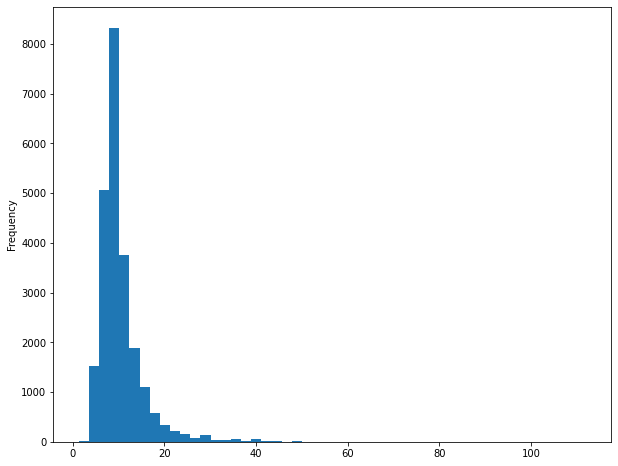

In [86]:
(
    data['kitchen_area']
    .plot(
        kind='hist',
        bins=50,
        figsize=(10, 8)
    )
)

Text(0.5, 0.98, 'Распределение площади кухни зависимости от количества комнат')

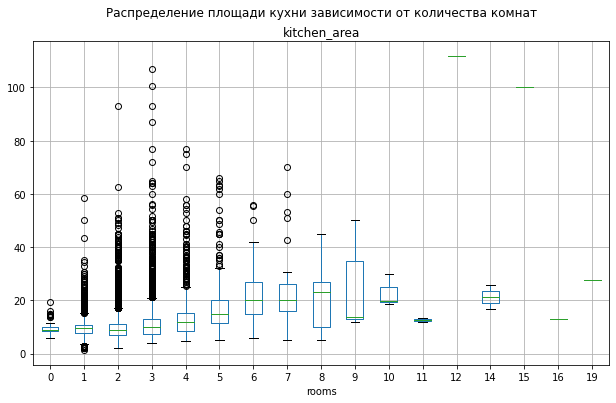

In [87]:
(data
 .boxplot(
     by = 'rooms',
     column = ['kitchen_area'],
     #bins = 50,
     figsize = (10, 6),
     grid = True,
 )
)

#plt.ylim(30, 35)
plt.suptitle('Распределение площади кухни зависимости от количества комнат')

Бросаются в глаза всплески значениях многокомнатных квартир с количеством комнат от 11 и выше, возможно дело в малом количестве таких объявлений, но разберемся с ними позже.


Из графика распреденления видно, что преобладают значения от 5 до 20 ${м^2}$, а диаграмма размаха позволяет увидеть, что все категории по количеству комнат укладываются в диапазон от 5 до 35 ${м^2}$

In [88]:
 data['kitchen_area'].describe()

count   23497.00
mean       10.53
std         5.67
min         1.30
25%         7.30
50%         9.50
75%        11.70
max       112.00
Name: kitchen_area, dtype: float64

Пропусков нет, однако, `data['kitchen_area'].describe()['min']` ниже значений нормативных документов:

[5.7 Площадь помещений в квартирах, указанных в 5.3, должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м, общего жилого помещения в квартирах с числом комнат две и более - 16 м, спальни - 8 м (10 м - на двух человек); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м.](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=5.7%C2%A0%D0%9F%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%20%D0%BF%D0%BE%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B9,%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%205%20%D0%BC.) 

Поэтому разумно взять данные по срезу `'kitchen_area >= 5'`, что соотносится с графиком размаха.

In [89]:
data = data.query('kitchen_area >= 5')

In [90]:
 data['kitchen_area'].describe()

count   23393.00
mean       10.56
std         5.67
min         5.00
25%         7.40
50%         9.50
75%        11.70
max       112.00
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

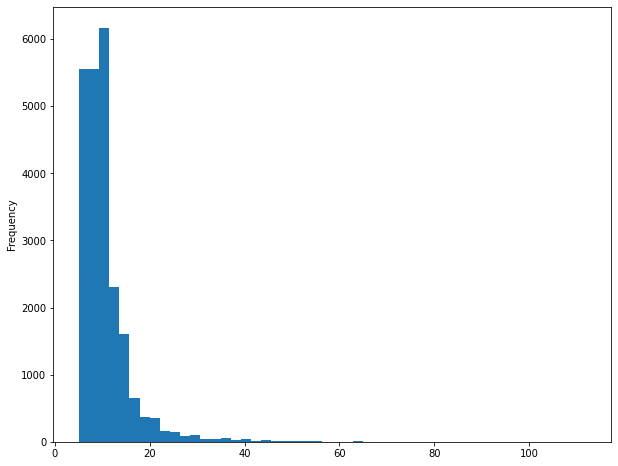

In [91]:
data['kitchen_area'].plot(
    kind='hist',
    bins=50,
#    ylim=(0, 25),
#    xlim=(50, 52),
    figsize=(10, 8)
)

По диаграмме видно, что плотность значений падает на отметке в 45 ${м^2}$, при этом ранее из диаграммы размаха мы видели, что большинство данных вписываются в диапазон от 5 до 35 ${м^2}$ поэтому ограничим выборку значением `'kitchen_area' <= 35` ${м^2}$:

<AxesSubplot:ylabel='Frequency'>

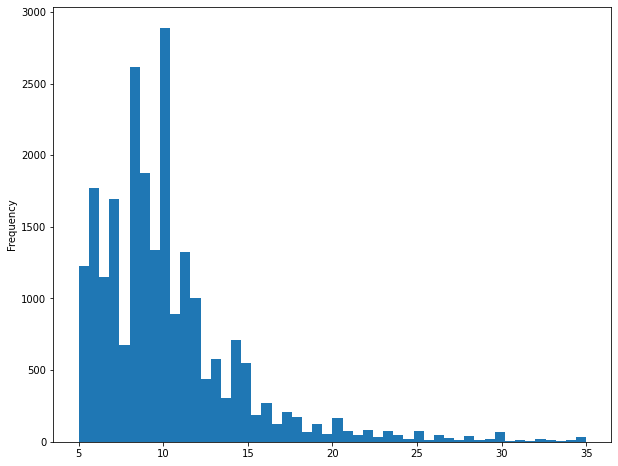

In [92]:
(data
 .query('kitchen_area<=35')['kitchen_area']
 .plot(
    kind='hist',
    bins=50,
#    ylim=(0, 1000),
#    xlim=(15, 30)
    figsize=(10, 8),
    #alpha = 0.5
)
)

In [93]:
data['kitchen_area'].describe()

count   23393.00
mean       10.56
std         5.67
min         5.00
25%         7.40
50%         9.50
75%        11.70
max       112.00
Name: kitchen_area, dtype: float64

<AxesSubplot:>

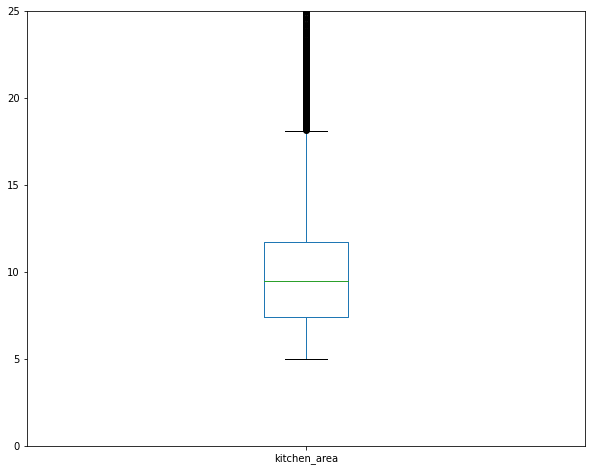

In [94]:
data['kitchen_area'].plot(
    kind='box',
    #bins=50,
    ylim=(0, 25),
#    xlim=(50, 52),
    figsize=(10, 8)
)

Таким образом удалось сгладить распределение данных, удалить сомнительные данные и выделить основной диапазон в который укладываются большинство данных:

`'5<=kitchen_area<=25'`

##### Жилая площадь

Рассмотрим описание столбца:

In [95]:
data['living_area'].describe()

count   23393.00
mean       34.42
std        21.78
min         2.00
25%        18.46
50%        30.50
75%        42.80
max       409.70
Name: living_area, dtype: float64

Из выводов выше видно, что ниже 1Q мы имеем набор значений от 2 до 18 $м^2$.

При этом из нормативных документов минимальная жилая площадь в 1к.кв. не должна быть менее 14 $ м^2$:

[5.7 Площадь помещений в квартирах, указанных в 5.3, должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м, общего жилого помещения в квартирах с числом комнат две и более - 16 м, спальни - 8 м (10 м - на двух человек); кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м.](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=5.7%C2%A0%D0%9F%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%20%D0%BF%D0%BE%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B9,%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%205%20%D0%BC.)

Поэтому возьмем срез данных, где `'living_area >= 14'`:

In [96]:
data.query('living_area >= 14')['living_area'].describe()

count   23080.00
mean       34.73
std        21.77
min        14.00
25%        18.70
50%        30.50
75%        43.00
max       409.70
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

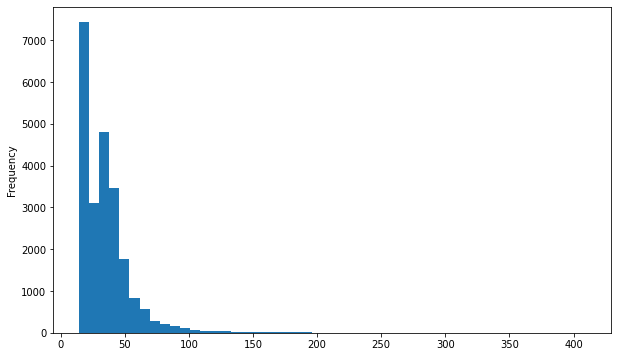

In [97]:
(data
 .query('living_area >= 14')['living_area']
 .plot(
    kind='hist',
    bins=50,
    figsize=(10, 6)
#    ylim=(0, 200,
#    xlim=(0, 100)
 )
)

Удалось нормализовать распределение данных, однако остаются значения выше 3Q 

<AxesSubplot:ylabel='Frequency'>

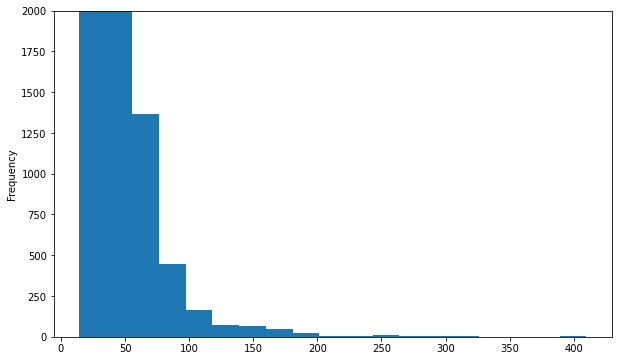

In [98]:
(data
 .query('living_area >= 14')['living_area']
 .plot(
    kind='hist',
    bins=data['rooms'].max(),
    #bins=100,
    figsize=(10, 6),
    ylim = (0, 2000)
))

Хорошо видно, что плотность распределия значений падает после значения 200 ${м^2}$ и после значения 250 ${м^2}$ данные сливаются с осью OX.

Рассмотрим данные с помощью диаграммы размаха:

<AxesSubplot:>

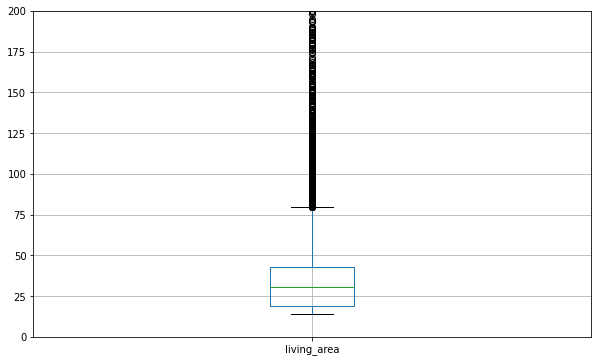

In [99]:
(data
 .query('14<=living_area<=200')['living_area']
 .plot(
    kind='box',
    grid=True,
    figsize=(10, 6),
    ylim=(0, 200)
 )
)

Исходя из данных диаграмм выше, примем верхнюю границу `'living_area' <= 200`: 

In [100]:
(data
 .query('14 <= living_area <= 200 ')['living_area']
 .describe())

count   23049.00
mean       34.41
std        19.95
min        14.00
25%        18.70
50%        30.50
75%        43.00
max       200.00
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

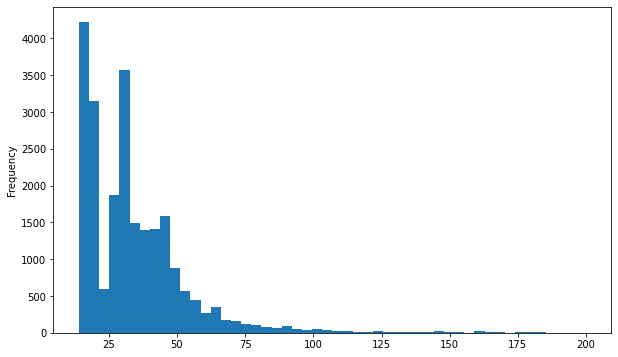

In [101]:
(data
 .query('14 <= living_area <= 200 ')['living_area']
 .plot(
    kind='hist',
    bins=50,
    figsize=(10, 6),
#    ylim=(0, 200),
#    xlim=(0, 20)
     
 )
)

Text(0.5, 0.98, 'Распределение жилой площади в зависимости от количества комнат')

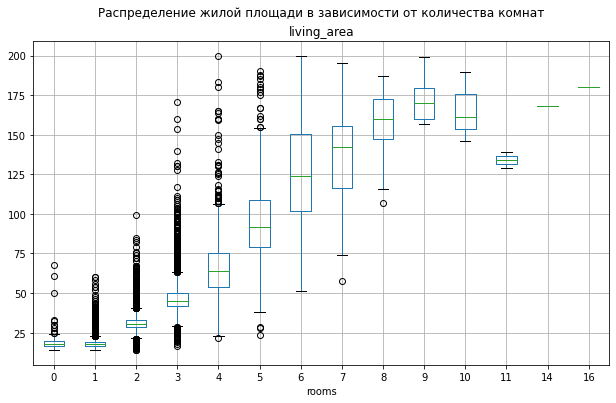

In [102]:
(data
 .query('14 <= living_area <= 200 ')
 .boxplot(
     by = 'rooms',
     column = ['living_area'],
     figsize = (10, 6),
     grid = True,
 )
)
#plt.ylim(50, 100)
plt.suptitle('Распределение жилой площади в зависимости от количества комнат')

Как и впункте выше видим отклонения от тренда в многоквартирных квартирах.

В остальных категориях (студия - 10 к.кв.) удалось избавиться от пропусков и странных значений, однако на графике явно выделяется всплеск на уровне минимальных значений. Это может быть связано со следующим

>[С 2015 года на первичном рынке помимо стандартных однокомнатных квартир проектируются студии, которые пользуются высоким спросом у инвесторов. Малогабаритные квартиры активно выводят на вторичный рынок.](https://spb.cian.ru/stati-kolichestvo-studij-na-vtorichnom-rynke-udvoilos-za-poslednie-chetyre-goda-329556/#:~:text=%D0%A1%202015%20%D0%B3%D0%BE%D0%B4%D0%B0%20%D0%BD%D0%B0%20%D0%BF%D0%B5%D1%80%D0%B2%D0%B8%D1%87%D0%BD%D0%BE%D0%BC%20%D1%80%D1%8B%D0%BD%D0%BA%D0%B5%20%D0%BF%D0%BE%D0%BC%D0%B8%D0%BC%D0%BE%20%D1%81%D1%82%D0%B0%D0%BD%D0%B4%D0%B0%D1%80%D1%82%D0%BD%D1%8B%D1%85%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%D0%BD%D1%8B%D1%85%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D1%83%D1%8E%D1%82%D1%81%D1%8F%20%D1%81%D1%82%D1%83%D0%B4%D0%B8%D0%B8%2C%20%D0%BA%D0%BE%D1%82%D0%BE%D1%80%D1%8B%D0%B5%20%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8E%D1%82%D1%81%D1%8F%20%D0%B2%D1%8B%D1%81%D0%BE%D0%BA%D0%B8%D0%BC%20%D1%81%D0%BF%D1%80%D0%BE%D1%81%D0%BE%D0%BC%20%D1%83%20%D0%B8%D0%BD%D0%B2%D0%B5%D1%81%D1%82%D0%BE%D1%80%D0%BE%D0%B2.%20%D0%9C%D0%B0%D0%BB%D0%BE%D0%B3%D0%B0%D0%B1%D0%B0%D1%80%D0%B8%D1%82%D0%BD%D1%8B%D0%B5%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B%20%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%20%D0%B2%D1%8B%D0%B2%D0%BE%D0%B4%D1%8F%D1%82%20%D0%BD%D0%B0%20%D0%B2%D1%82%D0%BE%D1%80%D0%B8%D1%87%D0%BD%D1%8B%D0%B9%20%D1%80%D1%8B%D0%BD%D0%BE%D0%BA.),

т.к. наши данные охватывают период с 2014г.

In [103]:
data['first_day_exposition'].describe()

/tmp/ipykernel_202/546544682.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['first_day_exposition'].describe()


count                   23393
unique                   1491
top       2018-02-01 00:00:00
freq                      360
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Основной диапазон охватывающий все квартиры от 14 до 200 ${м^2}$, приэтом по общей выборке наиболее валидным является верхняя граница в 80 ${м^2}$

##### Общая площадь

Сохраним значение `.describe()` для того, чтобы сверить результат

In [104]:
descrb_before = data['total_area'].describe()
descrb_before

count   23393.00
mean       60.55
std        35.70
min        12.00
25%        40.00
50%        52.00
75%        70.00
max       900.00
Name: total_area, dtype: float64

Попробуем рассмотреть площадь прочих помещений квартир:

Из вывода видим, что 75% записей не превышают отметку в ${70} м^2$, но максимальны значением является ${900} м^2$, а минимальным - ${12} м^2$, что выглядит подозрительным, ведь ранее мы установили:



Площадь помещений в квартирах, указанных в 5.3, должна быть не менее:
 - [ жилого помещения (комнаты) в однокомнатной квартире - 14 м](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=%D0%9F%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%20%D0%BF%D0%BE%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%B2%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%B0%D1%85%2C%20%D1%83%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%B2%205.3%2C%20%D0%B4%D0%BE%D0%BB%D0%B6%D0%BD%D0%B0%20%D0%B1%D1%8B%D1%82%D1%8C%20%D0%BD%D0%B5%20%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%3A%20%D0%B6%D0%B8%D0%BB%D0%BE%D0%B3%D0%BE%20%D0%BF%D0%BE%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%20(%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%D1%8B)%20%D0%B2%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%B5%20%2D%2014%20%D0%BC)
 
 - [кухни - 8 м; кухонной зоны в кухне-столовой - 6 м. В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5 м.](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=%D0%BA%D1%83%D1%85%D0%BD%D0%B8%20%2D%208%20%D0%BC%3B%20%D0%BA%D1%83%D1%85%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9%20%D0%B7%D0%BE%D0%BD%D1%8B%20%D0%B2%20%D0%BA%D1%83%D1%85%D0%BD%D0%B5%2D%D1%81%D1%82%D0%BE%D0%BB%D0%BE%D0%B2%D0%BE%D0%B9%20%2D%206%20%D0%BC.%20%D0%92%20%D0%BE%D0%B4%D0%BD%D0%BE%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82%D0%BD%D1%8B%D1%85%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%B0%D1%85%20%D0%B4%D0%BE%D0%BF%D1%83%D1%81%D0%BA%D0%B0%D0%B5%D1%82%D1%81%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8%20%D0%B8%D0%BB%D0%B8%20%D0%BA%D1%83%D1%85%D0%BD%D0%B8%2D%D0%BD%D0%B8%D1%88%D0%B8%20%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C%D1%8E%20%D0%BD%D0%B5%20%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%205%20%D0%BC.)
 
Рекомендуемая площадь квартир:

 - [Таблица 5.1](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=%D1%80%D0%B5%D1%81%D1%83%D1%80%D1%81%D0%BE%D0%BE%D0%B1%D0%B5%D1%81%D0%BF%D0%B5%D1%87%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8%20%D0%B6%D0%B8%D0%BB%D0%B8%D1%89%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D1%82%D0%B2%D0%B0.-,%D0%A2%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%205.1,-%D0%A7%D0%B8%D1%81%D0%BB%D0%BE%20%D0%B6%D0%B8%D0%BB%D1%8B%D1%85%20%D0%BA%D0%BE%D0%BC%D0%BD%D0%B0%D1%82)

|Число жилых комнат              |1    |2    |3    |4    |5    |6      | 
|:-------------------------------|:---:|:---:|:---:|:---:|:---:|:-----:|
|Рекомендуемая площадь квартир, м|28-38|44-53|56-65|70-77|84-96|103-109|




Т.е. значения ниже Q1 могут быть результатом ошибки при внесении данных.

Соответственно, можно предположить, что в данных `'total_area'` не учтена площадь межкомнатных помещений, либо значения из полей `'kitchen_area'` или `'living_area'`:

 >>${\Delta S} = {S_{рекомендуемая}} - ({S_{кухни}} + {S_{жил.помещений}})$,
 
 Например, опираясь на вышеуказанные данные из нормативных документов, рассчитаем значение межкомнатных помещений по минимальным значениям:
 
 >${\Delta S_{min}} = 28 - (5 + 14) = 9 {м^2}$
  
 Также, нельзя пренебрегать и тем, что межкомнатная площадь не может быть равна 0, т.к. должна включать в себя как минимум санузел, который может, занимать в зависимости от типа, от 2 до 7 ${м^2}$ и коридор. Таким образом можно ограничить выборку с 7 ${м^2}$

[Размеры – СНиП и DIN](https://setroom.ru/vannaya-i-tualet/kakie-byvayut-standartnye-razmery-sanuzlov-i-minimalnye-soglasno-snip.html#:~:text=%D0%94%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D1%83%D1%8E%D1%89%D0%B8%D0%B9%20%D1%82%D0%B5%D1%85%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D1%80%D0%B5%D0%B3%D0%BB%D0%B0%D0%BC%D0%B5%D0%BD%D1%82,%D1%81%D0%B0%D0%BD%D1%83%D0%B7%D0%BB%D0%B0%20%E2%80%93%20800%20%D0%BC%D0%BC.)

Создадим столбец `'delta_area'`, который послужит признаком неверно заполненных данных и выведем его описание: 

In [105]:
data['delta_area'] = data['total_area'] - (data['living_area'] + data['kitchen_area'])

In [106]:
data['delta_area'].describe()

count   23393.00
mean       15.58
std        15.18
min       -70.90
25%         9.00
50%        12.60
75%        18.00
max       467.00
Name: delta_area, dtype: float64

Отрицательное значение `data['delta_area'].describe()['min']` как раз подтверждает нашу гипотезу. 

Оценим долю этих значений:

In [107]:
'Доля отрицательных значений \'delta_area\': {:.2%}'.format(len(data.query('delta_area<0'))/len(data))

"Доля отрицательных значений 'delta_area': 1.69%"

Отбросим эти значения, как некорректные. Остается исправить минимальные значения:

In [108]:
data = data.query('delta_area > 0')

Построим гистограмму распределения, ограничив частоту выборки 200 ед., для того, чтобы увидеть значения после третьей квартили:

<AxesSubplot:ylabel='Frequency'>

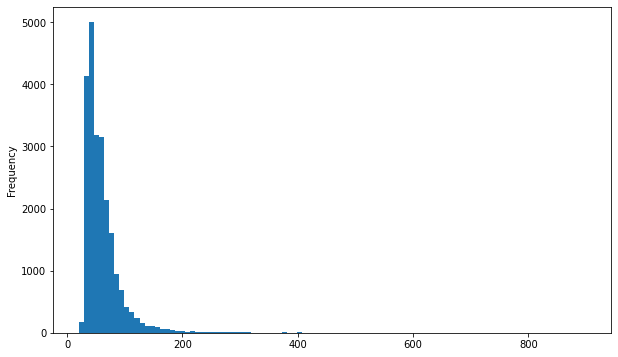

In [109]:
(data['total_area'].plot(
    kind='hist',
    bins=100,
#    ylim=(0, 200),
#    xlim=(47, 50),
    figsize=(10, 6)
 )
)

После значений в 300 ${м^2}$ плотность значений заметно снижается, поэтому оценим какую долю составляют значения более 300 ${м^2}$

In [110]:
(
    'Доля больших значений: {:.2%}'
    .format(
        len(data.query('total_area > 300'))/len(data)
    )
)

'Доля больших значений: 0.26%'

Создадим срез 

In [111]:
data.query('total_area <= 300')['total_area'].describe()

count   22859.00
mean       60.07
std        30.56
min        20.00
25%        40.50
50%        52.30
75%        70.00
max       300.00
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

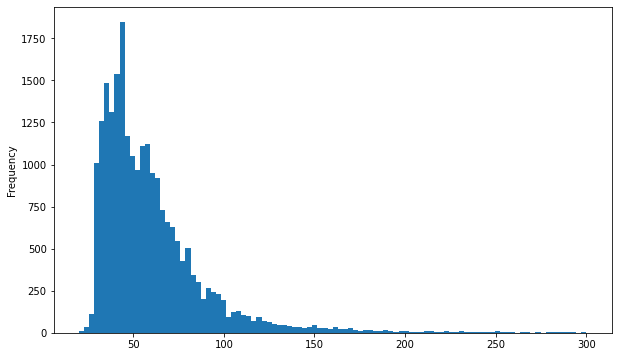

In [112]:
(data
 .query('total_area <= 300')['total_area']
 .plot(
    kind='hist',
    bins=100,
#    ylim=(0, 200),
#    xlim=(0, 100),
    figsize=(10, 6)
 )
)

In [113]:
'Дельта STD: {:.2%}'.format(
    data.query('total_area <= 300')['total_area'].describe()['std'] / descrb_before['std']-1
)

'Дельта STD: -14.39%'

Исходя из уменьшения `data['total_area'].describe()['std']` можно сделать вывод, что не смотря на увеличения шума на гистограмме, распределение значений более равномерно. 

Мы получили более равномерное распределение, без пропусков и соответствующие нормативным документам.

Рассмотрим, как распределяется общая площадь квартир по количеству комнат

Text(0.5, 0.98, 'Распределение общей площади в зависимости от количества комнат')

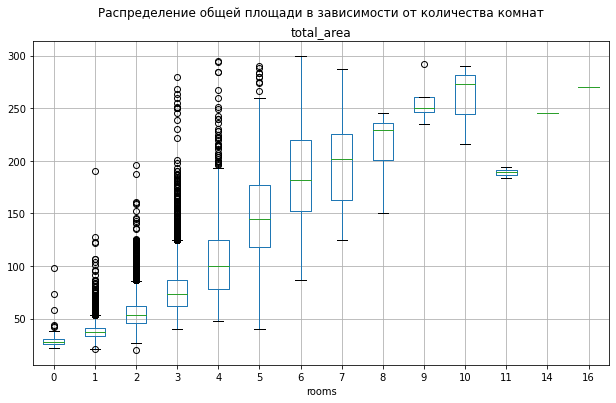

In [114]:
(data
 .query('total_area <= 300')
 .boxplot(
     by = 'rooms',
     column = ['total_area'],
     figsize = (10, 6),
     grid = True,
 )
)
#plt.ylim(250, 300)
plt.suptitle('Распределение общей площади в зависимости от количества комнат')

Общая площадь квартир возрастает достаточно равномерно до значений 11 к.кв. (рассмотрим их в следующем пункте), а общим диапазоном для большинства объявлений станет:

`'14 <= total_area <= 300'`

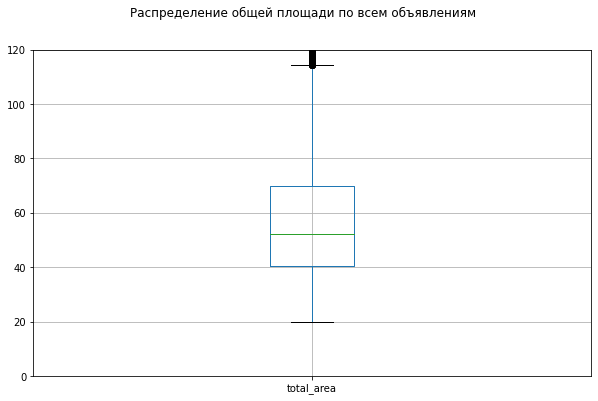

In [115]:
(data
 .query('total_area <= 300')
 .boxplot(
     #by = 'rooms',
     column = ['total_area'],
     figsize = (10, 6),
     grid = True,
 )
)
plt.ylim(0, 120)
plt.suptitle('Распределение общей площади по всем объявлениям')
plt.show()

При этом общий показатель по всей выборке составляет `'20 <= total_area <= 120'` 

Объединим данные в отдельный датасет:

In [116]:
research_area_data = data[
    [
        'kitchen_area', 
        'living_area', 
        'total_area', 
    ]
]

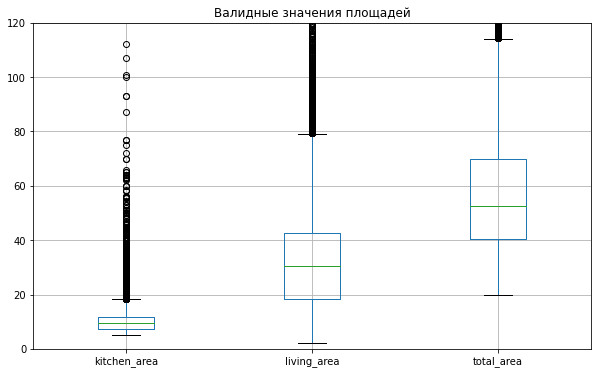

In [117]:
(research_area_data
 .plot(
     kind = 'box',
     grid =True,
     figsize = (10, 6),
     ylim = (0, 120),
     title = 'Валидные значения площадей'
 )
)
plt.show()

**Выделены следующие валидные показатели площадей:**
 -  Площадь кухни - `'5 <= kitchen_area <= 25'`;
 -  Жилая площадь - `'14 <= living_area <= 80'`; 
 -  Общая площадь - `'20 <= total_area <= 120'`;

#####  Количество комнат

Рассмотрим описание столбца `data['rooms']`:

In [118]:
data['rooms'].describe() 

count   22919.00
mean        2.09
std         1.07
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

Приведем у типу `Int`:

In [119]:
data['rooms'] = data['rooms'].astype(int)

In [120]:
data['rooms'].dtypes

dtype('int64')

Рассмотрим гистограмму столбца в диапазоне частоты до 1000 наблюдений, чтобы рассмотреть значения близкие к оси OX:

<AxesSubplot:ylabel='Frequency'>

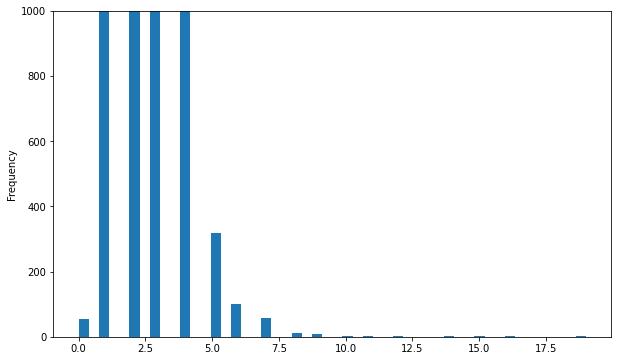

In [121]:
data['rooms'].plot(
    kind='hist',
    bins=50,
    ylim=(0, 1000),
    #xlim=(15, 30)
    figsize=(10, 6)
)

Видно, что после значения в 7 комнат плотность значений заметно ниже. 

Рассмотри значения комнат больше 7:

In [122]:
len(data.query('rooms > 7'))

30

In [123]:
(data
 .query('rooms > 7')
 .groupby('rooms')['rooms'].count()
)

rooms
8     11
9      8
10     3
11     2
12     1
14     2
15     1
16     1
19     1
Name: rooms, dtype: int64

In [124]:
'Доля квартир в аномальным значением квартир: {:.2%}'.format(
    len(data.query('rooms > 7'))/len(data)
)

'Доля квартир в аномальным значением квартир: 0.13%'

Низкое количество наблюдений и малая доля таких  квартир позволяет нам удалить эти данные.

Рассмотрим обновленные данные:

<AxesSubplot:ylabel='Frequency'>

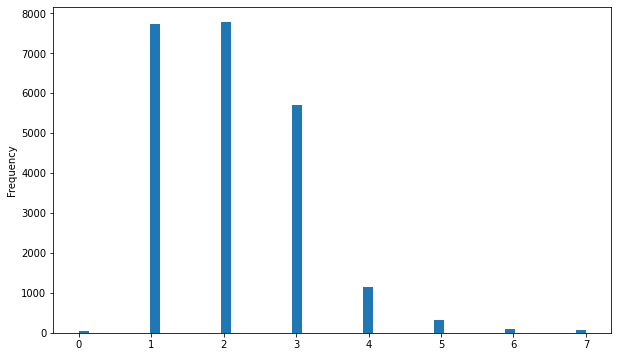

In [125]:
(data
 .query('rooms <= 7')['rooms']
 .plot(
    kind='hist',
    bins=50,
    #ylim=(0, 1000),
    #xlim=(15, 30)
    figsize=(10, 6)
 )
)

График равномерный, без выбросов, что соотносится с следующим
>Структура жилищного фонда в России с начала
XXI века остается неизменной: наибольшая доля
приходится на двухкомнатные квартиры - около
40%; при этом стоит отметить рост доли четырехкомнатных и более квартир с 6 до 8%. Чуть более
половины приходится на одно- и трехкомнатные
квартиры совокупно [(ссылка на статью)](https://voprstat.elpub.ru/jour/article/download/1050/751)

In [126]:
data = data.query('rooms <= 7')

In [127]:
'Доля 2к.кв.: {:.2%}'.format(len(data.query('rooms == 2'))/len(data))

'Доля 2к.кв.: 33.95%'

In [128]:
'Доля 1к.кв + 3к.кв.: {:.2%}'.format(
    (
        len(data.query('rooms == 1')) 
        + len(data.query('rooms == 3'))
    )/len(data)
)

'Доля 1к.кв + 3к.кв.: 58.68%'

Для простоты дальнейшей манипуляции данными остальные квартиры объединим в категорию `'другие'`

In [129]:
def check_room_type(val):
    if (val == 0) or (val > 3):
        return 'другие'
    else:
        res = str(val) + ' к.кв.'
        return res

In [130]:
data['rooms_num_type'] = data['rooms'].apply(check_room_type)

In [131]:
data.groupby('rooms')['rooms_num_type'].first()

rooms
0     другие
1    1 к.кв.
2    2 к.кв.
3    3 к.кв.
4     другие
5     другие
6     другие
7     другие
Name: rooms_num_type, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

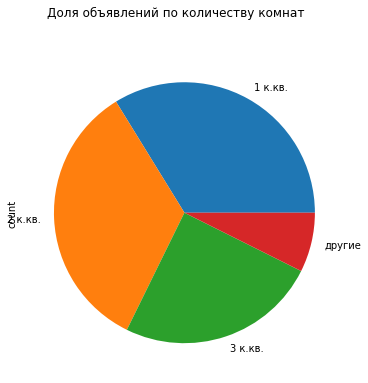

In [132]:
(data
 .groupby('rooms_num_type')['rooms']
 .agg(['count'])
 .plot(
     kind = 'pie',
     subplots = True,
     legend = False,
     figsize = (10, 6),
     title = "Доля объявлений по количеству комнат"
 )
)


plt.show

Наибольшую долю обявлений составляют объявления об 1 - 3-х ком. квартирах, поэтому оценивая объявления о многокомнатых квартирах значения площадей возрастают.


##### Цена Объекта

Рассмотрим описание столбца `'last_price'` и выведем гистограмму:

In [133]:
data['last_price'].describe()

count       22889.00
mean      6572466.52
std      10536089.30
min         12190.00
25%       3500000.00
50%       4700000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

Для более удобного и читаемого формата данных создадим новый столбец, в котором отобразим цены в миллионах:

In [134]:
data['last_price_mln'] = data['last_price']/1000000

<AxesSubplot:>

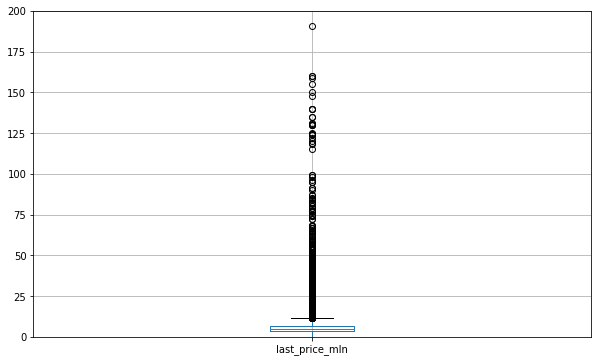

In [135]:
data['last_price_mln'].plot(
    kind='box',
#    bins= 50,
    grid=True,
    figsize=(10, 6),
    ylim=(0, 200)
)


Минимум и максимум выглядят подозрительно, а основная плотность данных падает после отметки в 100 млн. 

Для оценки средней стоимости рассмотрим сводную таблицу сгруппированую по полю `'rooms'`, в которой отобразим максимальное значение стоимости квартир:

<AxesSubplot:title={'center':'Максимальная стоимость квартир'}, xlabel='rooms'>

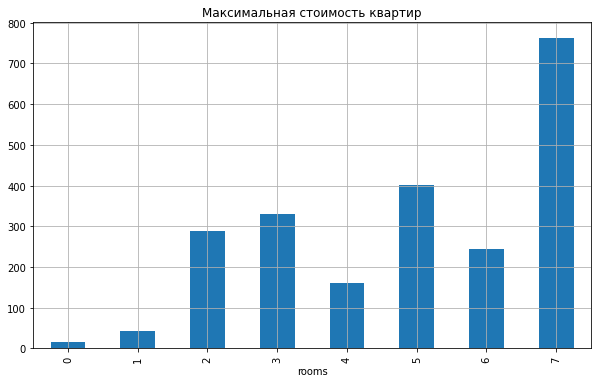

In [136]:
(data
 .groupby('rooms')['last_price_mln']
 .agg(
     'max'
 ).plot(
     kind = 'bar',
     y = 'last_price_mln',
     figsize = (10, 6),
     grid = True,
     title = 'Максимальная стоимость квартир'
 )
)

Из графика видно, что стоимость квартир возрастает достаточно равномерно, однако резкий взлет цен 2-х и более комнатных квартир выглядит подозрительно.

Рассмотрим эти данные детальней:

<AxesSubplot:ylabel='Frequency'>

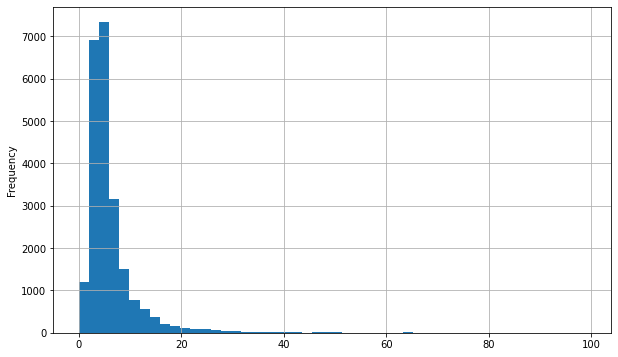

In [137]:
(data
 .query('last_price_mln < 100')['last_price_mln']
 .plot(
     kind = 'hist',
     bins = 50, 
     grid = True,
     figsize = (10, 6),
     #ylim = (0, 100)
 )
)


Из гистограммы видно, что большая часть объектов не превышают в стоимости 60 млн. Оценим какое количество данных выходит за этот предел.

In [138]:
(
    'Доля квартир более 60 млн.: {:.2%}'
    .format(
        len(data.query('last_price_mln>60')) / len(data)
    )
)

'Доля квартир более 60 млн.: 0.41%'

Удалим эти данные и выведем обновленную диаграмму:

In [139]:
data = data.query('last_price_mln<60')

In [140]:
data['last_price'].describe()

count      22796.00
mean     6122713.53
std      5270010.44
min        12190.00
25%      3500000.00
50%      4699000.00
75%      6800000.00
max     59914124.00
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Максимальная стоимость квартир'}, xlabel='rooms'>

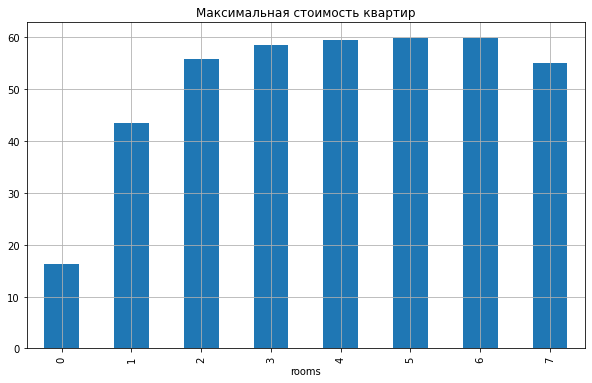

In [141]:
(data
 .groupby('rooms')['last_price_mln']
 .agg(
     'max'
 ).plot(
     kind = 'bar',
     y = 'last_price_mln',
     figsize = (10, 6),
     grid = True,
     title = 'Максимальная стоимость квартир'
 )
)

<AxesSubplot:title={'center':'Распределение стоимости квартир'}, ylabel='Frequency'>

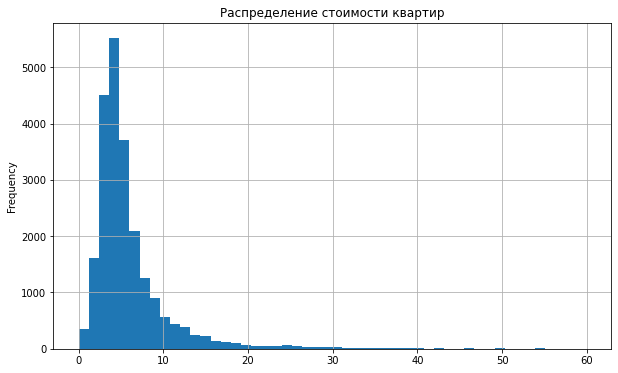

In [142]:
(data['last_price_mln']
 .plot(
     kind = 'hist',
     bins = 50,
     #y = 'last_price_mln',
     figsize = (10, 6),
     grid = True,
     #xlim = (0, 2.5),
     title = 'Распределение стоимости квартир'
 )
)

Резких перепадов данных стало меньше. Теперь стои уделить внимание минимальной стоимости квартир.

Рассмотрим как распределяется стоимость квартир с разным количеством комнат:

Text(0.5, 0.98, 'Распределение стоимости квартир в зависимости от количества комнат')

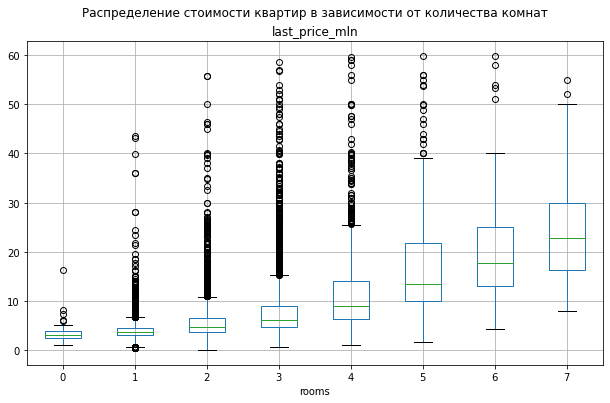

In [143]:
(data #.query('rooms==1')
 .boxplot(
     by = 'rooms',
     column = ['last_price_mln'],
     #bins = 50,
     figsize = (10, 6),
     grid = True,
 )
)

#plt.ylim(0, 5)
plt.suptitle('Распределение стоимости квартир в зависимости от количества комнат')

Выделим минимальные значения и оценим их вес в общей выборке:

In [144]:
data.query('last_price_mln<0.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_stat,price_for_square_meter,week_day,month,month_name,year,floor_type,cityCenters_nearest_km,delta_area,rooms_num_type,last_price_mln
5698,7,450000.00,42.00,2017-07-31,2,2.62,1.00,23.00,1,True,False,False,5.80,0,городской посёлок Будогощь,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00,233.00,Будогощь,10714.29,0,7,Июль,2017,первый,NaN,13.20,2 к.кв.,0.45
8793,7,12190.00,109.00,2019-03-20,2,2.75,25.00,32.00,25,True,False,False,40.50,0,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,-10.00,8.00,Санкт-Петербург,111.83,2,3,Март,2019,последний,9.18,36.50,2 к.кв.,0.01
10782,3,490000.00,29.10,2016-05-05,1,2.50,5.00,17.00,5,True,False,False,5.50,0,Сланцы,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00,719.00,Сланцы,16838.49,3,5,Май,2016,последний,NaN,6.60,1 к.кв.,0.49
16032,8,480000.00,32.00,2019-01-06,1,2.50,2.00,16.00,1,True,False,False,9.00,0,Сланцы,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00,83.00,Сланцы,15000.00,6,1,Январь,2019,первый,NaN,7.00,1 к.кв.,0.48
17456,7,430000.00,30.40,2019-04-22,1,2.50,2.00,16.00,1,True,False,False,6.00,0,Сланцы,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00,NaN,Сланцы,14144.74,0,4,Апрель,2019,первый,NaN,8.40,1 к.кв.,0.43
21912,0,470000.00,37.00,2018-02-18,1,2.60,3.00,17.60,3,True,False,False,9.50,0,поселок Совхозный,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00,45.00,Совхозный,12702.70,6,2,Февраль,2018,последний,NaN,9.90,1 к.кв.,0.47
23484,11,470000.00,44.50,2018-07-02,2,2.50,2.00,28.00,2,True,False,False,7.50,0,Сланцы,-10.00,-10.00,-10.00,-10.00,-10.00,-10.00,298.00,Сланцы,10561.80,0,7,Июль,2018,последний,NaN,9.00,2 к.кв.,0.47


Удалим строчку со значением `data['last_price'].describe()['min']` и выведем обновленную гистограмму:

In [145]:
describe_min = data['last_price'].describe()['min']

data = data.query('last_price != @describe_min')

<AxesSubplot:ylabel='Frequency'>

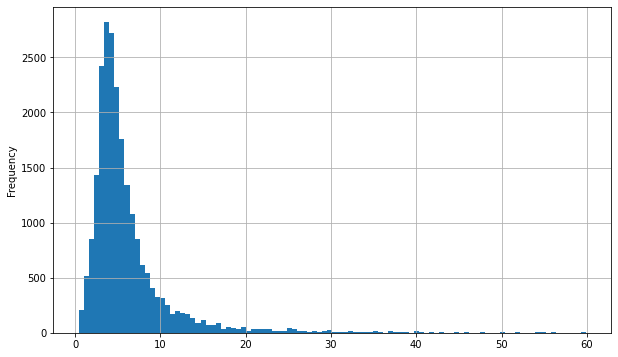

In [146]:
data['last_price_mln'].plot(
    kind = 'hist',
    bins = 100,
    grid = True,
    figsize = (10, 6),
    #ylim = (0, 1)
    #xlim = (0, 1)
)

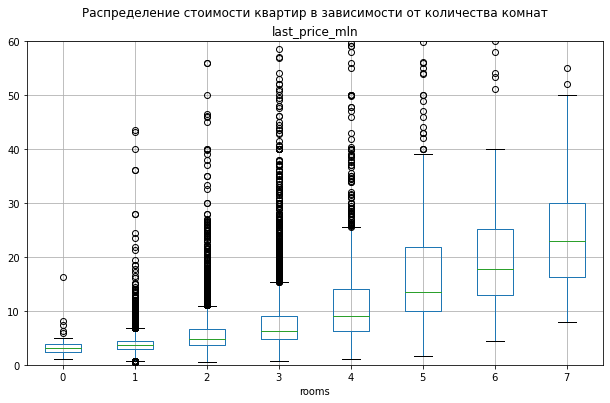

In [147]:
(data #.query('rooms==1')
 .boxplot(
     by = 'rooms',
     column = ['last_price_mln'],
     #bins = 50,
     figsize = (10, 6),
     grid = True,
 )
)

plt.ylim(0, 60)
plt.suptitle('Распределение стоимости квартир в зависимости от количества комнат')
plt.show()

In [148]:
data['last_price'].describe()

count      22795.00
mean     6122981.59
std      5269970.62
min       430000.00
25%      3500000.00
50%      4699000.00
75%      6800000.00
max     59914124.00
Name: last_price, dtype: float64

Теперь график возрастает более равномерно и можно сделать следующий вывод:


 - Основное большинство значений стоимости квартир лежит в диапазоне `'430000 <= last_price <= 50000000'`



##### Высота потолков

Рассмотрим данные столбца с помощью графика:

<AxesSubplot:>

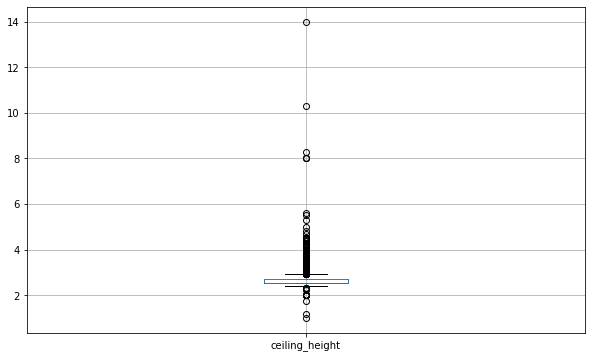

In [149]:
data['ceiling_height'].plot(
    kind='box',
    #bins= 50,
    grid=True,
    figsize=(10, 6)
#    ylim=(0,3)
)


<AxesSubplot:ylabel='Frequency'>

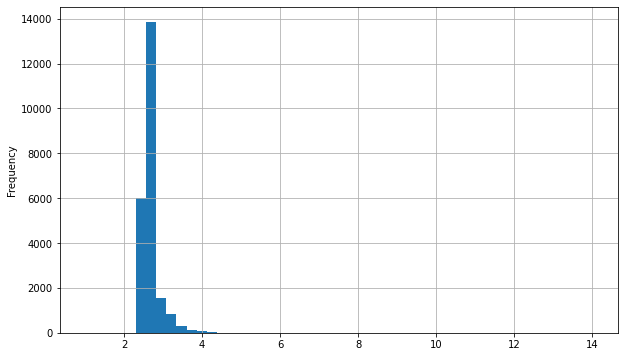

In [150]:
data['ceiling_height'].plot(
    kind='hist',
    bins= 50,
    grid=True,
    figsize=(10, 6)
#    ylim=(0, 50)
)


Исходя из диаграммы размаха, хорошо видно, что плотность распределения значений после 6 м значительно падает, а на гистограмме порог видимых значений ограничивается 4-мя м.

При этом значения менее 2,5 м противорячат требованиям СНиП. Логично изменить значения ниже минимальных на 2,5


In [151]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x if x>data['ceiling_height'].describe()['25%'] else 2.5)
    

In [152]:
data['ceiling_height'].describe()

count   22795.00
mean        2.70
std         0.25
min         2.50
25%         2.50
50%         2.70
75%         2.70
max        14.00
Name: ceiling_height, dtype: float64

In [153]:
'Доля {:.2%}'.format(len(data.query('ceiling_height>4'))/len(data))

'Доля 0.18%'

In [154]:
data = data.query('ceiling_height<8')

In [155]:
data['ceiling_height'].describe()

count   22789.00
mean        2.70
std         0.22
min         2.50
25%         2.50
50%         2.70
75%         2.70
max         5.60
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

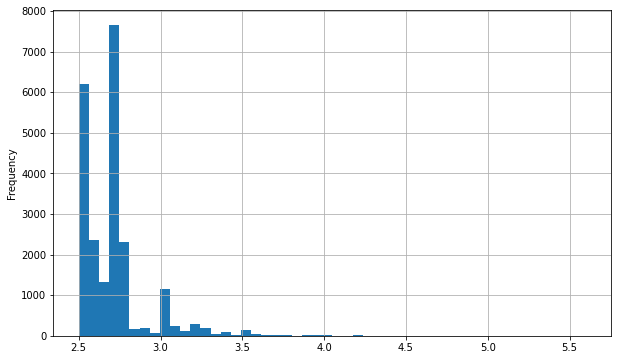

In [156]:
data['ceiling_height'].plot(
    kind='hist',
    bins= 50,
    grid=True,
    figsize=(10, 6)

)


График выглядит более шумным, но при этом значения распределяются в полне логично, исходя из требований СНиП

##### Тип этажа

Рассмотрим какое количество квартир по ранее определенному типу этажа в выборке:

<AxesSubplot:>

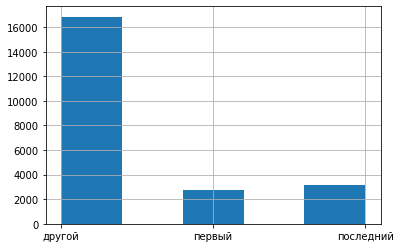

In [157]:
data['floor_type'].hist(bins=5)

Выведем сводную таблицу, в которой рассчитаем долю каждой категории:

In [158]:
floor_type_df = data.groupby('floor_type')['floor_type'].agg(['count'])
floor_type_df['share'] = (floor_type_df['count']/ floor_type_df['count'].sum())*100
floor_type_df = floor_type_df.set_axis(['Количество', 'Доля'], axis=1)
floor_type_df.sort_values(by='Доля', ascending=False)

,Количество,Доля
floor_type,,
другой,16851,73.94
последний,3166,13.89
первый,2772,12.16


Наибольшую долю в объявлениях представляют квартиры в категории `"другой" - 74%`, рассмотрим ее детальней:

<AxesSubplot:xlabel='floor'>

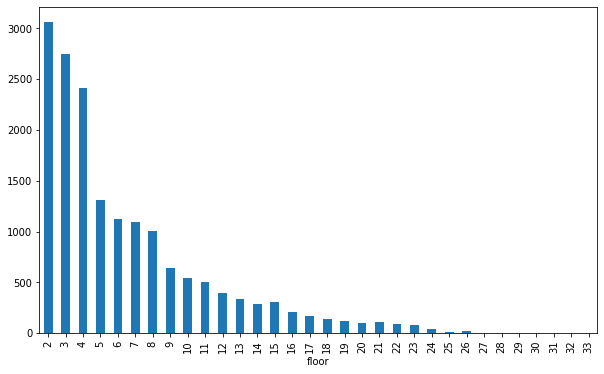

In [159]:
(
    data
    .query('floor_type == "другой"')
    .groupby('floor')['floor'].agg('count')
    .plot(
        kind = 'bar',
        figsize = (10, 6),
        y = 'floor'
    )
)

Основное большинство квартир занимают диапазон до 15 этажей, это связано с основной классификацией жилых доммов:

>Современная классификация многоэтажного жилья в нашей стране подразумевает три
категории: 
> - 1) многоэтажные (лифтовые) здания — 6—9 этажей; 
> - 2) здания повышенной этажности — 10—16 этажей (>28 м); 
> - 3) высотные здания — свыше 16 этажей (>50 м).

["МНОГОЭТАЖНЫЙ ЖИЛОЙ ДОМ
С ОБСЛУЖИВАНИЕМ"
Методические указания и задание к курсовому проекту
составитель Т. Н. Кондратьева](https://vgasu.ru/attachments/mnogoetzhiloydomsobsluzhivaniem_kondrateva.pdf)

##### Общее количество этажей

Рассмотрим описание изучаемого столбца:

In [160]:
data['floors_total'].describe()

count   22715.00
mean       10.67
std         6.55
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

<AxesSubplot:>

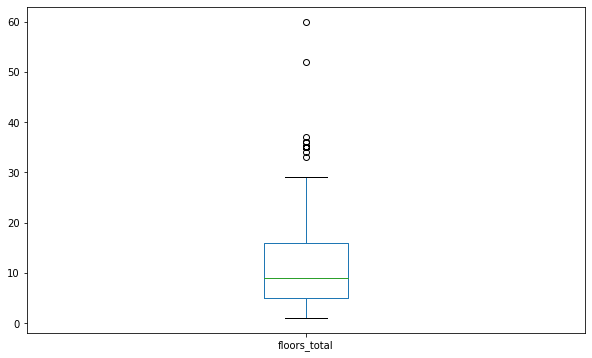

In [161]:
data['floors_total'].plot(
    kind = 'box',
    #bins = 20,
    figsize = (10, 6),
    #ylim = (0, 5),
    #xlim = (25, 40)
)

Основной массив данных ограничивается данными с максимальным количество этажей от 1 до 30, отсальные значения можно принять как аномальные.

Рассмотрим сколько значений выше верхней границы диаграммы размаха:

In [162]:
len(data.query('floors_total > 30'))

29

In [163]:
'Доля аномальных значений: {:.2%}'.format(
    len(data.query('floors_total > 30')) / len(data)
)

'Доля аномальных значений: 0.13%'

<AxesSubplot:ylabel='Frequency'>

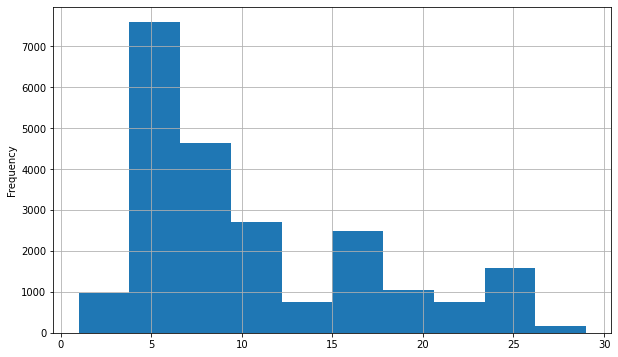

In [164]:
(data
 .query('floors_total <= 30')['floors_total']
 .plot(
    kind = 'hist',
    bins = 10,
    grid = True,
    figsize = (10, 6),
    #ylim = (0, 5),
    #xlim = (25, 40)
))

Удалим аномальные данные, т.к. доля этих данных невелика

In [165]:
data = data.query('floors_total <= 30')
data['floors_total'].describe()

count   22686.00
mean       10.64
std         6.49
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        29.00
Name: floors_total, dtype: float64

Итоговые данные соотносятся с выводом из предыдущего пункта, добавим в диаграмму категорию дома по количеству этажей, для определения их доли

In [166]:
def categorize_house(val):
    if val < 6:
        return '0-малоэтажный'
    if val < 10:
        return '1-многоэтажный'
    if val < 17:
        return '2-повышенной этажности'
    else:
        return '3-высотный'

In [167]:
data['num_of_floors'] = data['floors_total'].apply(categorize_house)

In [168]:
display(
    'Уникальные значения:', data['num_of_floors'].unique(),
    'Количество пропусков:', data['num_of_floors'].isna().sum()
)

'Уникальные значения:'

array(['2-повышенной этажности', '0-малоэтажный', '3-высотный',
       '1-многоэтажный'], dtype=object)

'Количество пропусков:'

0

In [169]:
data.groupby(['num_of_floors', 'floors_total'])['floors_total'].first()

num_of_floors           floors_total
0-малоэтажный           1.00            1.00
                        2.00            2.00
                        3.00            3.00
                        4.00            4.00
                        5.00            5.00
1-многоэтажный          6.00            6.00
                        7.00            7.00
                        8.00            8.00
                        9.00            9.00
2-повышенной этажности  10.00          10.00
                        11.00          11.00
                        12.00          12.00
                        13.00          13.00
                        14.00          14.00
                        15.00          15.00
                        16.00          16.00
3-высотный              17.00          17.00
                        18.00          18.00
                        19.00          19.00
                        20.00          20.00
                        21.00          21.00
                  

Оценим доля представленных типов домов по этажности:

In [170]:
house_type_df = data.groupby('num_of_floors')['floors_total'].agg(['count'])
house_type_df['Доля'] = (house_type_df['count'] / house_type_df['count'].sum())*100
house_type_df = house_type_df.set_axis(['Количество', 'Доля'], axis=1)

house_type_df.sort_values(by='Доля', ascending=False)

,Количество,Доля
num_of_floors,,
0-малоэтажный,7685,33.88
1-многоэтажный,5487,24.19
2-повышенной этажности,5139,22.65
3-высотный,4375,19.29


Такое расположение долей вполне логично с точки зрения ретроспективы и последовательном пересмотре нормативных документов и постепенное повышение этажности.

##### Расстояние от центра города

Перед рассмотрением данного параметра напомним, что ранее мы заменили пропуски на значение `-10`, доля таких пропусков составляла порядка 30%, поэтому будем создадим срез без учета этих данных:


Рассмотрим гистограмму распределения:

In [171]:
filtered_geodata_df = data.query('cityCenters_nearest!=-10').copy()
filtered_geodata_df['cityCenters_nearest'].describe()

count   17526.00
mean    14242.17
std      8595.49
min       181.00
25%      9344.75
50%     13137.00
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

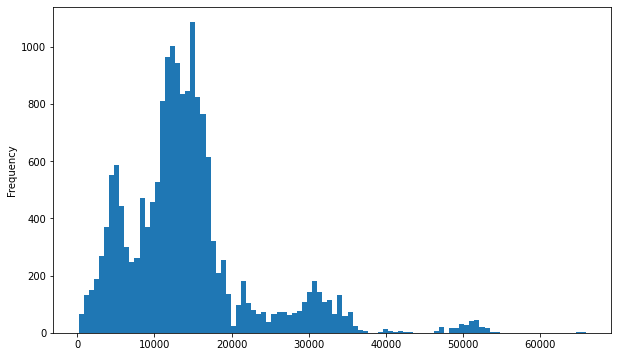

In [172]:
filtered_geodata_df['cityCenters_nearest'].plot(
    kind='hist',
    figsize=(10, 6),
    bins=100,
#    ylim=(0, 100),
#    xlim=(0, 40000)
)

Дополнительно создадим следующие категории, отталкиваясь от пиков гистограммы:
 1) `0 - 5000 - зона 0` - центр города;
 2) `5000 - 10000 - зона 1` - прилежащая к центру территория до окраиных спальных районов;
 3) `10000 - 15000 - зона 2` - спальные районы в пределах КАД;
 4) `15000 - 20000 - зона 3` - ближайший пригород и новые спальные районы;
 5) `20000 и более - зона 4` - населеные пункты за границей КАД и ЗСД, дальний пригород.

In [173]:
def check_distance(val):
    if val <= 5000:
        return 'зона 0'
    if val <= 10000:
        return 'зона 1'
    if val <= 15000:
        return 'зона 2'
    if val <= 20000:
        return 'зона 3'
    else:
        return 'зона 4'

In [174]:
filtered_geodata_df['distance_cat'] = filtered_geodata_df['cityCenters_nearest'].apply(check_distance)


In [175]:
distance_pt = filtered_geodata_df.groupby('distance_cat')['cityCenters_nearest'].agg(['min', 'max', 'median', 'count'])

distance_pt['Доля'] = (distance_pt['count'] / distance_pt['count'].sum()) * 100

distance_pt = distance_pt.set_axis(['Min', 'Max', 'Медиана', 'Количество', 'Доля'], axis=1)

distance_pt.sort_values(by = 'Доля', ascending = False)

,Min,Max,Медиана,Количество,Доля
distance_cat,,,,,
зона 2,10001.00,14998.00,12660.50,6574,37.51
зона 3,15004.00,19942.00,16357.00,3584,20.45
зона 1,5007.00,9997.00,7675.00,2890,16.49
зона 4,20160.00,65968.00,30232.00,2530,14.44
зона 0,181.00,4999.00,3819.00,1948,11.11


Зона 0: 0 - 5 км.
Зона 1: 5 - 10 км.
Зона 2: 10 - 15 км.
Зона 3: 15 - 20 км.
Зона 3: > 20 км.


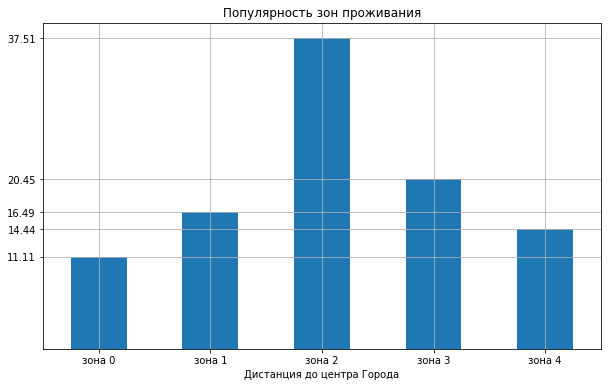

In [176]:
(distance_pt['Доля']
 .plot(
     kind = 'bar',
     figsize = (10, 6),
     xlabel = 'Дистанция до центра Города',
     rot = 0,
     title = 'Популярность зон проживания',
     yticks = distance_pt['Доля'],
     grid = True
))

(
    print(
        'Зона 0: 0 - 5 км.\nЗона 1: 5 - 10 км.\nЗона 2: 10 - 15 км.\nЗона 3: 15 - 20 км.\nЗона 3: > 20 км.'
    )
)

plt.show()

Исходя из данных сводной таблицы, и гистограммы видно сделать следующий вывод:
 - данные распределяются достаточно равномерно исходя из географических и административных границ города.
 - наиболее популярная зона проживания находятся на расстоянии 10-15 км., от центра города,
 - наиболее не полурен район центра города.

##### Расстояние до ближайшего парка

Для анализа перезапишем `filtered_geodata_df`, по тому же принципу что и в предыдущем пункте:

In [177]:
filtered_geodata_df = data.query('parks_nearest != -10')

In [178]:
filtered_geodata_df['parks_nearest'].describe()

count   7794.00
mean     491.59
std      341.92
min        1.00
25%      288.00
50%      455.50
75%      613.00
max     3190.00
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

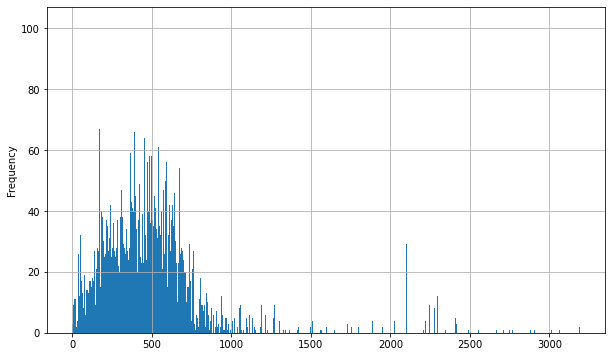

In [179]:
(filtered_geodata_df['parks_nearest']
 .plot(
    kind = 'hist',
    bins = 1000,
    grid = True,
    figsize = (10, 6),
    #ylim = (0, 200),
    #xlim = (-10, 300)
 )
)

<AxesSubplot:>

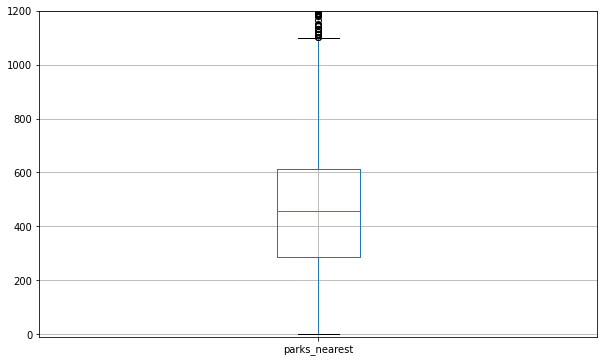

In [180]:
(filtered_geodata_df['parks_nearest']
 .plot(
    kind = 'box',
    #bins = 1000,
    grid = True,
    figsize = (10, 6),
    ylim = (-10, 1200),
    #xlim = (-10, 300)
 )
)

Расстояние в 1 м кажется подозрительным тем неменее, исходя из данных диаграмм выше можно заключить, что диапазон верных данных находится до отметки в 1100 м., а малые значения могут быть связаны с ошибками в работе геосервисов, как и большое количество пропусков в соответствующих полях, о чем уже упоминали ранее.

#### Скорость продажи квартир

Выполнено задание «Изучите, как быстро продавались квартиры (столбец days_exposition)»:

 - построена гистограмма;
 - рассчитаны среднее и медиана;
 - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.

Рассмотрим насколько быстро продавались квартиры:
  - для начала рассмотрим есть ли пропуски в выборке:

In [181]:
data['days_exposition'].isna().sum()

3060

Т.к. мы не можем заполнить эти данные, используем срез:

In [182]:
days_exposition_df = data[data['days_exposition'].isna()!=True]

In [183]:
days_exposition_df['days_exposition'].isna().sum()

0

In [184]:
days_exposition_df['days_exposition'].describe()

count   19626.00
mean      181.73
std       220.20
min         1.00
25%        45.00
50%        97.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

Рассмотрим гистограмму распределения, ограниченную Q3, для лучшей детеализации:

<AxesSubplot:ylabel='Frequency'>

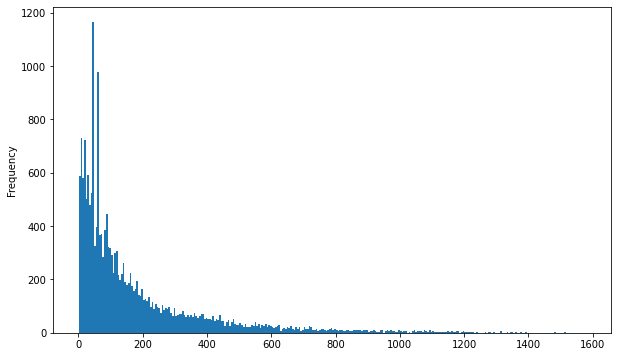

In [185]:
days_exposition_df['days_exposition'].plot(
    kind='hist',
    bins=300,
    figsize=(10, 6),
#    ylim=(),
#    xlim=(42, 50)
)

In [186]:
q3_iqr = ((days_exposition_df['days_exposition'].quantile(0.75)-
            days_exposition_df['days_exposition'].quantile(0.25)
        )*
         1.5 + days_exposition_df['days_exposition'].quantile(0.75))

In [187]:
q3_iqr

512.5

Можно сделать следующий вывод:
 - Быстрой можно считать продажу в течении полутора месяца, т.к эти значения входят в Q1 выборки
 - Значения расположенные выше верхней границы диаграммы размаха( ~ 1.5 лет) можно расценивать как аномально долгие, т.к. эти данные:
     - это может быть связано с ошибками в данных объявления;
     - параметры квартиры сильно отличаются от статистического большинство, что может отпугнуть покупателя.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Если рассмотреть график на отрезке 0-100 дней, то можно обнаружить пик на отметке 7-11 дней и 43-48 дней. Эти пики сязаны с религиозными обрядами.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Интересная версия) На самом деле это особенность функционирования системы размещения объявлений) Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

#### Факторы влияющие на стоимость квартир

##### Зависимость от количественных переменных

Изучим, зависит ли цена от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).

In [188]:
sample_df = data[
    [
        'total_area', 
        'living_area', 
        'kitchen_area', 
        'rooms',
        'last_price'
    ]
]


Рассчитаем 

In [189]:
q3_iqr = ((data['last_price'].quantile(0.75)-
            data['last_price'].quantile(0.25)
        )*
         1.5 + data['last_price'].quantile(0.75))

In [190]:
q3_iqr

11750000.0

Как видно из диаграммы размаха, есть выбросы, ограничим выборку верхней границей диаграммы размаха 
 > ${Q3+1.5*IQR = 11750000}$

In [191]:
#data = data.query('last_price<@q3_iqr') 

<AxesSubplot:ylabel='Frequency'>

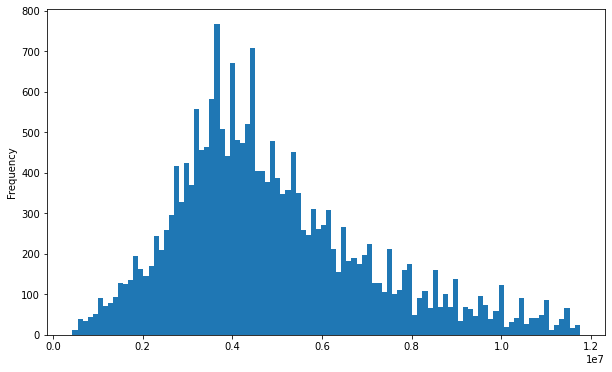

In [192]:
data.query('last_price<@q3_iqr')['last_price'].plot(
    kind='hist',
    bins=100,
    figsize=(10, 6),
#    ylim=(0, 100),
#    xlim=(10000000, 90000000)
)

In [193]:
data['last_price'].describe()

count      22686.00
mean     6117983.52
std      5271397.81
min       430000.00
25%      3500000.00
50%      4690000.00
75%      6800000.00
max     59914124.00
Name: last_price, dtype: float64

Построим матрицу корреляции, для того, чтобы выделить линейно зависимые параметры:

In [194]:
sample_df.corr().sort_values(by='last_price', ascending=False)

,total_area,living_area,kitchen_area,rooms,last_price
last_price,0.78,0.66,0.58,0.49,1.00
total_area,1.00,0.91,0.57,0.77,0.78
living_area,0.91,1.00,0.37,0.87,0.66
kitchen_area,0.57,0.37,1.00,0.24,0.58
rooms,0.77,0.87,0.24,1.00,0.49


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

Наиболее весомыми параметрами являются:
 - общая площадь, поле `'total_area'`, $\rho = 0.65$;
 - жилая площадь, поле `'living_area'`, $\rho = 0.56$;
 - площадь кухни, поле `'kitchen_area'`, $\rho = 0.48$;
 - количество комнат, поле `'rooms'`, $\rho = 0.41$, 
 
      *где **$\rho$** Коэффициент корреляции Пирсона*
 
Остальные параметры, такие как период продажи, не так сильно влияют на стоимость квартиры.

Выведем обновленную визуализацию:

<function matplotlib.pyplot.show(close=None, block=None)>

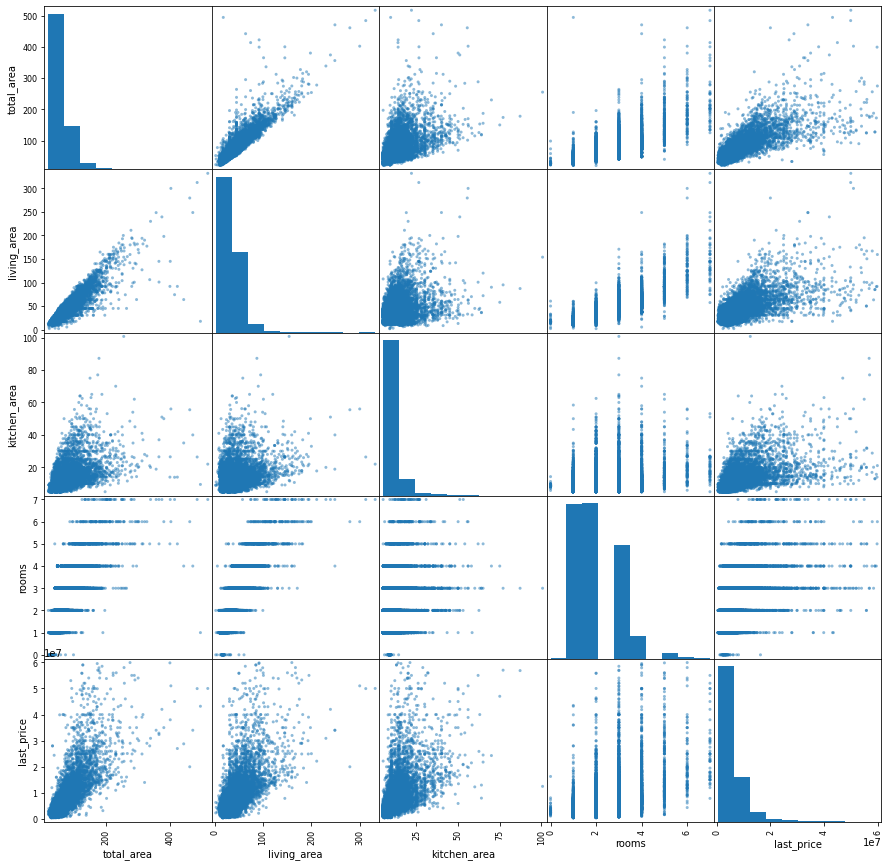

In [195]:
(
    pd.plotting.scatter_matrix(sample_df[
        [
            'total_area',
            'living_area',
            'kitchen_area',
            'rooms',
            'last_price'
        ]
    ], figsize=(15, 15)) 
)
plt.show

##### Зависимость от категориальных переменных

###### Этаж расположения

Рассмотрим как влияют на стоимость этаж на котором расположена квартира:

In [196]:
pt_floors = data.groupby('floor')['last_price_mln'].agg(['median']).reset_index()


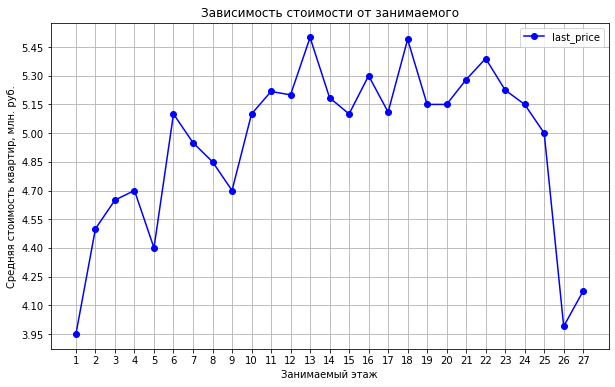

In [197]:
plt.figure(figsize=(10, 6))
x = pt_floors['floor']
y = pt_floors['median']


plt.plot(
    x, 
    y,
    'o-b',
    label='last_price'  
)

plt.xticks(ticks = pt_floors['floor'])
plt.yticks(
    np.arange(
        pt_floors['median'].min(),
        pt_floors['median'].max(),
        0.15
    )
)
plt.title('Зависимость стоимости от занимаемого')
plt.xlabel('Занимаемый этаж')
plt.ylabel('Средняя стоимость квартир, млн. руб.')
plt.legend()
plt.grid(True)
plt.show()

Как видно из графика, стоимость возрастает до отметки 13 этажа, а после отметки 22 начинает спадать, при этом видны провалы на отметка:
 - 5;
 - 9;
 - 12;
 - 15;
 - 17;
 - 20.
 
 
 Эти отметки соответствуют уровням этажности зданий и можно сделать вывод что последние этажи и этажи выше отметки 22 этажа пользуются меньшим спросом, что и отражается на их цене, также более "высокие" квартиры могут отличаться меньшим количеством комнат.

#####  Дата размещения

даты размещения (день недели, месяц, год).

###### День недели

In [198]:
pt_day = data.groupby('week_day')['last_price_mln'].agg(['median', 'count', 'sum']).reset_index()
pt_day

,week_day,median,count,sum
0,0,4.70,3468,21521.63
1,1,4.78,4004,24396.97
2,2,4.75,3815,23646.70
3,3,4.70,4110,26077.42
4,4,4.60,3837,22833.12
5,5,4.60,1840,10806.46
6,6,4.57,1612,9510.28


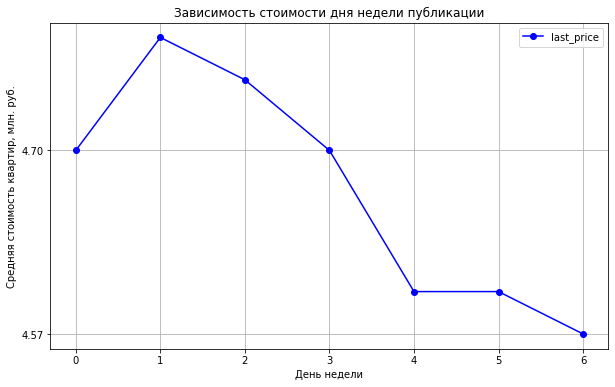

In [199]:
plt.figure(figsize=(10, 6))
x = pt_day['week_day']
y = pt_day['median']


plt.plot(
    x, 
    y,
    'o-b',
    label='last_price'  
)

plt.xticks(ticks = pt_day['week_day'])
plt.yticks(
    np.arange(
        pt_day['median'].min(),
        pt_day['median'].max(),
        0.13
    )
)
plt.title('Зависимость стоимости дня недели публикации')
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость квартир, млн. руб.')
plt.legend()
plt.grid(True)
plt.show()

Нельзя однозначно сказать, что цена прямо зависит от дня в который выложено объявлени. Есть пик медианного значения во вторник на уровне 4.8 млн., однако сильнее прослеживается взаимосвязь количества объявлений.

Так, например, количество объявлений в выходные дни ниже, чем в будни.

В будние же дни, минимальным количеством объявлений отличается понедельник.

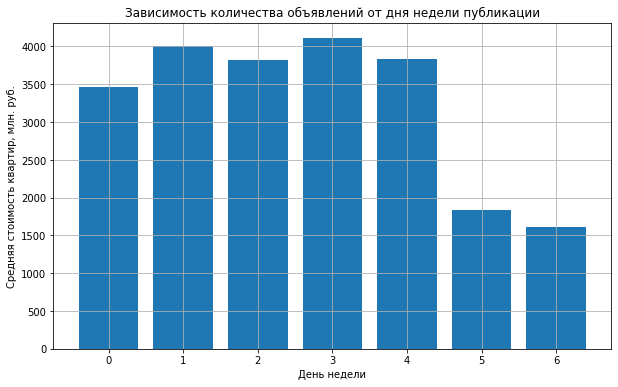

In [200]:
plt.figure(figsize=(10, 6))
x = pt_day['week_day']
y = pt_day['count']


plt.bar(
    x, 
    height = pt_day['count'],
    #'o-b',
    #label='last_price'  
)

plt.xticks(ticks = pt_day['week_day'])

plt.title('Зависимость количества объявлений от дня недели публикации')
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость квартир, млн. руб.')
#plt.legend('Количество объявлений')
plt.grid(True)
plt.show()

###### Месяц

Для анализа возьмем медианную стоимость одного квадратнаго метра, агрегированную по месяцам:

In [201]:
pt_month = data.groupby('month')['price_for_square_meter'].agg(['median', 'count', 'sum']).reset_index()
pt_month

,month,median,count,sum
0,1,95161.29,1443,143135267.19
1,2,95000.00,2534,248189154.18
2,3,95293.47,2474,242093834.11
3,4,96089.52,2272,225647807.88
4,5,92319.98,1206,116802921.70
5,6,92857.14,1685,163204896.43
6,7,94736.84,1605,156059990.70
7,8,95370.37,1674,165576912.55
8,9,95599.69,1904,187446709.37
9,10,94166.02,2048,198448624.09


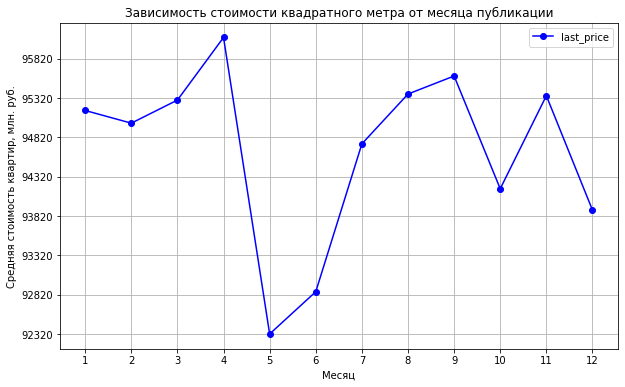

In [202]:
plt.figure(figsize=(10, 6))
x = pt_month['month']
y = pt_month['median']


plt.plot(
    x, 
    y,
    'o-b',
    label='last_price'  
)

plt.xticks(ticks = pt_month['month'])
plt.yticks(
    np.arange(
        pt_month['median'].min(),
        pt_month['median'].max(),
        500
    )
)
plt.title('Зависимость стоимости квадратного метра от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость квартир, млн. руб.')
plt.legend()
plt.grid(True)
plt.show()

Глядя на график можно сделать вывод, что ***связь данных параметров хоть и прослеживается, но она слабая и скорее связана с иными факторами***, тем не менее:

- с января по апрель явно прослеживается рост средней стоимости квартир
- с апреля по май, наблюдается резкий спад, эти данные можно изучить подробнее.
- с июня по сентябрь график снова идет наверх, из чего можно сделать вывод, что к летним месяцам цена немного растет;
- с сентября по декабрь график без резких перепадов на с видимой отрицательной динамикой, что можно связать с началом учебного года, подготовкой к закрытию фин.года.

###### Год

In [203]:
pt_year = data.groupby('year')['price_for_square_meter'].agg(['median', 'count', 'sum']).reset_index()
pt_year

,year,median,count,sum
0,2014,106636.31,128,15413075.81
1,2015,92952.24,1130,113346776.72
2,2016,91463.41,2641,254544157.66
3,2017,92375.00,7873,755136454.96
4,2018,95652.17,8150,792665034.52
5,2019,103072.20,2764,292215691.25


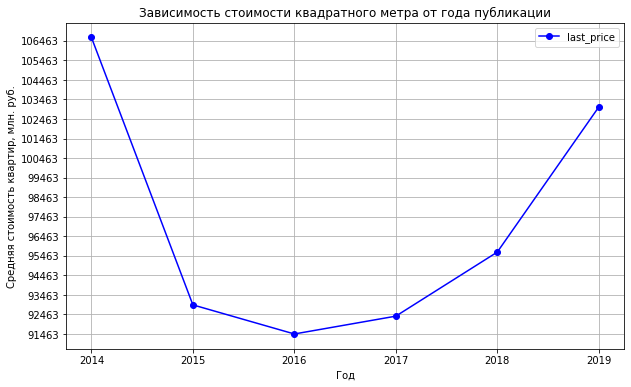

In [204]:
plt.figure(figsize=(10, 6))
x = pt_year['year']
y = pt_year['median']


plt.plot(
    x, 
    y,
    'o-b',
    label='last_price'  
)

plt.xticks(ticks = pt_year['year'])
plt.yticks(
    np.arange(
        pt_year['median'].min(),
        pt_year['median'].max(),
        1000
    )
)
plt.title('Зависимость стоимости квадратного метра от года публикации')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость квартир, млн. руб.')
plt.legend()
plt.grid(True)
plt.show()

Бросается в глаза резкий спад стоимсоти в перио с 2014 по 2015 год, могу это связать с меньшим количеством данных (2014 - 128 наблюдений, против 1130 в 2015 году).
В целом, если отбросить 2014 год, то видим, что после небольшой стогнации в 2015 году в дальнейшем цена 1 ${м^2}$ непрерывно растет. Данная динамика соотносится с официальной информации с сайта [РОСРИЭЛТ](https://rosrealt.ru/sankt-peterburg/cena/?t=dinamika#:~:text=%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D0%BA%D0%B0%20%D1%86%D0%B5%D0%BD%20%D0%BD%D0%B0%20%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C%20%D0%B2%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82%2D%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B5%20%D0%BF%D0%BE%20%D0%B3%D0%BE%D0%B4%D0%B0%D0%BC), хотя и наблюдается расхождение в абсолютных значения. Могу связать это с более широкой выборкой по сравнению с исследуемой.

#### Цена квадратного метра TOP-10 локаций

Создадим новую сводную таблицу сгруппированную по полю `'locality_name_stat'` (очищенные данные) со следующими столбцами:
 - `'count'`, количество объявлении в населенном пункте;
 - `'sum'`, сумма площади представленных объявление в населенном пункте.
 
 Выберем из нее первые 10 значений:

In [205]:
pt_price_1m = (
    data
    .groupby('locality_name_stat')['total_area']
    .agg(
        [
            'count',
            'sum'
        ]
    )
    .sort_values('count', ascending=False)
    .head(10)
)

pt_price_1m

,count,sum
locality_name_stat,,
Санкт-Петербург,15162,963915.65
Мурино,530,24421.03
Кудрово,431,20729.71
Шушары,430,23419.71
Всеволожск,382,21612.42
Пушкин,364,22474.98
Колпино,334,17507.44
Парголово,320,16612.38
Гатчина,297,15197.88


Добавим новый столбец представляющий собой общую сумму по полю `'last_price'` по населенному пункту деленную на значение соответствующего поля `'sum'`, а после переименуем столбцы:
 - `'num_of_advert'`, количество объявлений;
 - `'sum_m^2'`, сумма поля `'total_area'`
 - `'1m^2_cost'`, стоимость ${1м^2}$

In [206]:
pt_price_1m["1m^2_cost"] = (
    data
    .groupby('locality_name_stat')['last_price']
    .agg('sum')
    / pt_price_1m['sum']
)

pt_price_1m.columns = ['num_of_advert', 'sum_m^2', '1m^2_cost']

In [207]:
pt_price_1m

,num_of_advert,sum_m^2,1m^2_cost
locality_name_stat,,,
Санкт-Петербург,15162,963915.65,116018.55
Мурино,530,24421.03,82668.56
Кудрово,431,20729.71,93549.44
Шушары,430,23419.71,76029.63
Всеволожск,382,21612.42,67707.66
Пушкин,364,22474.98,105250.12
Колпино,334,17507.44,73849.70
Парголово,320,16612.38,87034.52
Гатчина,297,15197.88,68517.41


В таблице выше отображены стоимость ${1м^2}$ жилой площади, по населенным пунктам, что соотносится со справочной информацией с сайта https://rosrealt.ru/



[Архив цен на жилую недвижимость в Санкт-Петербурге](https://rosrealt.ru/sankt-peterburg/cena/?t=dinamika#:~:text=%D0%90%D1%80%D1%85%D0%B8%D0%B2%20%D1%86%D0%B5%D0%BD%20%D0%BD%D0%B0%20%D0%B6%D0%B8%D0%BB%D1%83%D1%8E%20%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C%20%D0%B2%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82%2D%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B5)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Как вариант, тут можно построить барплот для топ10 по средней цене, так будет более наглядно)
</div>

#### Средняя стоимость квартир Санкт-Петербурга в зависимости от расстояния от центра города

Создадим сводную таблицу с данными только по Санкт-Петербургу, сгруппированную по расстоянию от центра города, для оценки стоимость в зависимости от удаления. Для этого округлим значения поля `'cityCenters_nearest_km'` до целого.

In [208]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0) 

In [209]:
pt_cityCenters_nearest = (
    data
    .query('locality_name_stat == "Санкт-Петербург"')
    .groupby('cityCenters_nearest_km')['last_price']
    .agg(
        [
            'count', 
            'median'
        ]
    )
    .reset_index()
)

In [210]:
pt_cityCenters_nearest

,cityCenters_nearest_km,count,median
0,0.00,23,13500000.00
1,1.00,173,10770000.00
2,2.00,283,9800000.00
3,3.00,336,8419000.00
4,4.00,667,9200000.00
5,5.00,865,9300000.00
6,6.00,589,8650000.00
7,7.00,402,7550000.00
8,8.00,586,7400000.00
9,9.00,563,5500000.00


Построим график, для визуализации зависимости:

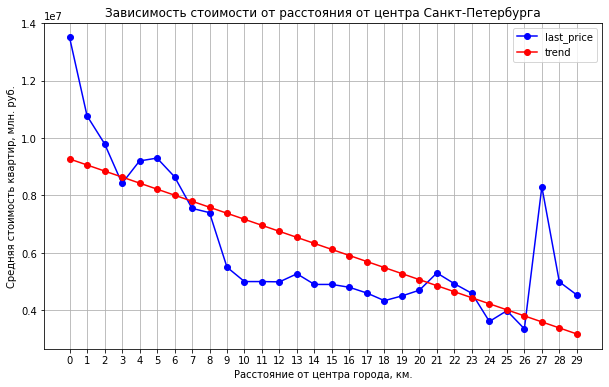

In [211]:
plt.figure(figsize=(10, 6))
x = pt_cityCenters_nearest['cityCenters_nearest_km']
y = pt_cityCenters_nearest['median']


plt.plot(
    x, 
    y,
    'o-b',
    label='last_price'  
)

z = np.polyfit (x, y, 1 )
p = np.poly1d (z)

plt.plot(
    x,
    p(x),
    'o-r',
    label='trend' 
)
plt.xticks(ticks = pt_cityCenters_nearest['cityCenters_nearest_km'])
plt.title('Зависимость стоимости от расстояния от центра Санкт-Петербурга')
plt.xlabel('Расстояние от центра города, км.')
plt.ylabel('Средняя стоимость квартир, млн. руб.')
plt.legend()
plt.grid(True)

In [212]:
'Коэффициент корреляции: {:.2%}'.format(
    pt_cityCenters_nearest['median'].corr(pt_cityCenters_nearest['cityCenters_nearest_km'])
)

'Коэффициент корреляции: -75.20%'

Из графика хорошо видна тенденция к снижению стоимости квартиры с увеличение растояния от центра города. Но при этом на цену также будут оказывать влияние описанные в п. 4.5 параметры.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>На каком километре заканчивается центр города на твой взгляд, судя по графику?
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Исходя из графика, на удалении свыше 5 км, идет достаточно резкий спад по цене, который можно проследить до дистанции 19 км, где начинаются спальные районе внутри КАД или ЗСД. А перепады на расстоянии от 0 до 5 км можно объяснить неравномерностью жилищного фонда в центре города, где рядом с небольшим количеством элитного жилья достаточно много квартир с низким качеством жилищного фонда и слабой инфраструктурой. 
    
    
</div>

[Рынок жилья Санкт-Петербурга: центральные районы](https://www.bn.ru/gazeta/articles/7219/#:~:text=1485475-,%D0%A0%D1%8B%D0%BD%D0%BE%D0%BA%20%D0%B6%D0%B8%D0%BB%D1%8C%D1%8F%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82%2D%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0%3A%20%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5%20%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D1%8B,-%D0%A6%D0%B5%D0%BD%D1%8B%20%D0%BD%D0%B0%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D1%8B)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Верно!
</div>

### Напишите общий вывод

**Вывод:**

1. В данных были обнаружены ряд выбросов и аномалий, которые могут быть образованы как при неверном внесении данных пользователем, так и образованные в результате ошибки. Были внесены изменения в следующие параметры:
 - поля `'is_apartment'`, `'balcony'`: обнаружено большое количество пропусков;
 - поле `'locality_name'`: все наименования приведены к единому формату, убраны неявные дубликаты. Обновленные названия собраны в поле `'locality_name_stat'`
 - поля `'ceiling_height'`, `'living_area'`, `'kitchen_area'`: исправлены аномальные значения, пропуску заполнены медианными значениями.
 - поля геоданных: обнаружено большое количество пропусков, создан отледный срез с пропусками `'geo_error_df'` для дополнительного анализа
 
2. Благодаря статистическим методам удалось снизить количество некорректных данных, тем самым сократив итоговый датасет:
 
3. Для обработки данных использовались следующие источники:
     - [СНиП 31-01-2003 Здания жилые многоквартирные](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=%D0%BF%D0%BE%20%D0%BF%D0%BE%D0%B6%D0%B0%D1%80%D0%BD%D0%BE%D0%B9%20%D0%B1%D0%B5%D0%B7%D0%BE%D0%BF%D0%B0%D1%81%D0%BD%D0%BE%D1%81%D1%82%D0%B8-,%D0%A1%D0%9D%D0%B8%D0%9F%2031%2D01%2D2003%20%D0%97%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%B6%D0%B8%D0%BB%D1%8B%D0%B5%20%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%BD%D1%8B%D0%B5,-%D0%A1%D0%9D%D0%B8%D0%9F%2031%2D01)
     - [Сайт РосРиэлт](https://rosrealt.ru/sankt-peterburg/cena/?t=dinamika#:~:text=%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D0%BA%D0%B0%20%D1%86%D0%B5%D0%BD%20%D0%BD%D0%B0%20%D0%BD%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C%20%D0%B2%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82%2D%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B5%20%D0%BF%D0%BE%20%D0%B3%D0%BE%D0%B4%D0%B0%D0%BC)
     - [Статья "Основные тенденции на первичном рынке жилой недвижимости", Звездина Н.В., Грачева С.С,](https://voprstat.elpub.ru/jour/article/download/1050/751)
     
 
 
4. В ходе исследования выявлены следующие параметры влияющия на рыночную стоимость квартир в Санкт-Петербурге и ЛО:
     - общая площадь, поле `'total_area'`, $\rho = 0.65$;
     - жилая площадь, поле `'living_area'`, $\rho = 0.56$;
     - площадь кухни, поле `'kitchen_area'`, $\rho = 0.48$;
     - количество комнат, поле `'rooms'`, $\rho = 0.41$;
     - расстояние от центра города `'cityCenters_nearest'`, $\rho = -0.82$,
     
  где $\rho$ Коэффициент корреляции Пирсона
  
5. Проведен сравнительный анализ зон в которых расположена квартира: 
     - наиболее популярной оказалась зона в радиусе 10 - 15 км (`'Зона 2'`, поле `'distance_cat'`)
  
6. Обнаружена зависимость стоимости квартиры от занимаего этажа:
     - меньшей популярностью пользуются последние и первые этажи; 
     
7. Подтверждена динамика роста цен YoY, также обнаружена слабая связь меджу стоимостью 1 ${м^2}$ месяцем публикации: 
     - наиболее удачными можно считать период с марта по апрель, а также с июня по сентябрь;
     
8. Создан рейтинг TOP-10 по стоимости 1 ${м^2}$:
     - 1 место логично занимает Санкт-Петербург, однако стоит отметить, что количество наблюдений по ЛО кратно меньше, чем по СПБ, что также стоит учитывать.
     
9. Можно заключить, что наибольшей популярностью будут пользоваться квартиры следующего типа:
    - расположений: СПб, `Зона 2: 10 - 15 км.`;
    - параметры квартиры:
        - Площадь кухни - `'5 <= kitchen_area <= 25'`;
        - Жилая площадь - `'14 <= living_area <= 80'`; 
        - Общая площадь - `'20 <= total_area <= 120'`;
        - Высота потолка - `'2.5 <= ceiling_height <= 2.7'`;
        - Занимаемы этаж - `'floor_type == "другой"'`, оптимальный этаж: `'11 <= floor <= 22'` 
        - Период публикации - февраль-март (*предпочтительный*), либо июль - август.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Давай немного увеличим объем вывода, чтобы он получится более подробным. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. Твой вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Супер! Так гораздо лучше)
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- отбросить аномальные значения 
<br>- корректно выполнить задание 4.1	
<br>- корректно выполнить задание 4.3	
<br>- дописать общий вывод

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).

- [x]  В таблицу добавлены новые параметры:

       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
       
- [x]  Изучены и описаны параметры:

        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
        
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:

        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.